In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.dates as mdates
import numpy as np

import intake

from functions_collector import xr_pearsonr          # computes r and p given two xarrays
from functions_collector import gaussian_filter_nan  # very useful for filtering in time

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
meteor = xr.open_dataset("ipfs://bafybeib5awa3le6nxi4rgepn2mwxj733aazpkmgtcpa3uc2744gxv7op44", engine="zarr")
meteor

<xarray.Dataset> Size: 20MB
Dimensions:           (time: 58980)
Coordinates:
  * time              (time) datetime64[ns] 472kB 2024-08-14 ... 2024-09-23T2...
    lat               (time) float64 472kB ...
    lon               (time) float64 472kB ...
Data variables: (12/39)
    PM1               (time) float64 472kB ...
    PM10              (time) float64 472kB ...
    PM2p5             (time) float64 472kB ...
    lwr               (time) float64 472kB ...
    p_air             (time) float64 472kB ...
    rh_board          (time) float64 472kB ...
    ...                ...
    wdir              (time) float64 472kB ...
    wdir_rel          (time) float64 472kB ...
    wspd              (time) float64 472kB ...
    wspd_kn           (time) float64 472kB ...
    wspd_rel          (time) float64 472kB ...
    wspd_rel_kn       (time) float64 472kB ...
Attributes:
    creator_email:  hans.segura@mpimet.mpg.de
    creator_name:   Hans Segura
    featureType:    trajectory
    history:        Converted to Zarr by Lukas Kluft (lukas.kluft@mpimet.mpg.de)
    license:        CC-BY-4.0
    platform:       RV METEOR
    project:        ORCESTRA, BOW-TIE
    source:         DVS DShip
    title:          Ship information database (DVS DShip) of METEOR cruise M203

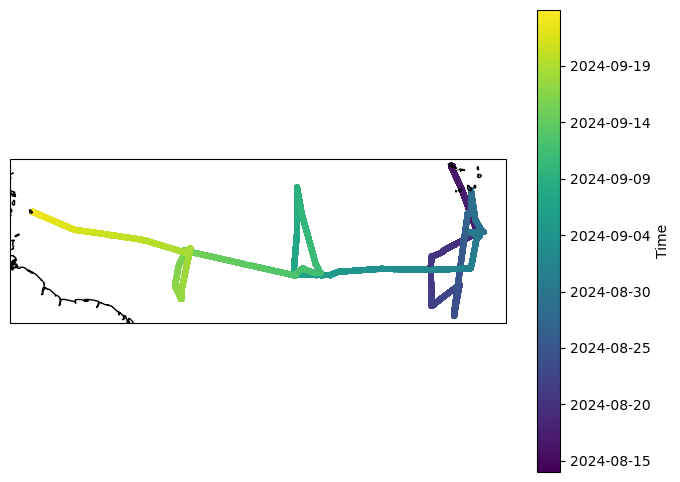

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.dates as mdates

# Convert time to numeric values for coloring
time_values = meteor["time"].values
time_num = mdates.date2num(time_values)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

sc = ax.scatter(
    meteor["lon"].values,
    meteor["lat"].values,
    c=time_num,
    cmap="viridis",
    s=10,
    transform=ccrs.PlateCarree()
)

# Colorbar with date formatting
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Time")
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.show()


In [3]:
meteor_cut = meteor.sel(time=slice("2024-09-23", "2024-09-23"))

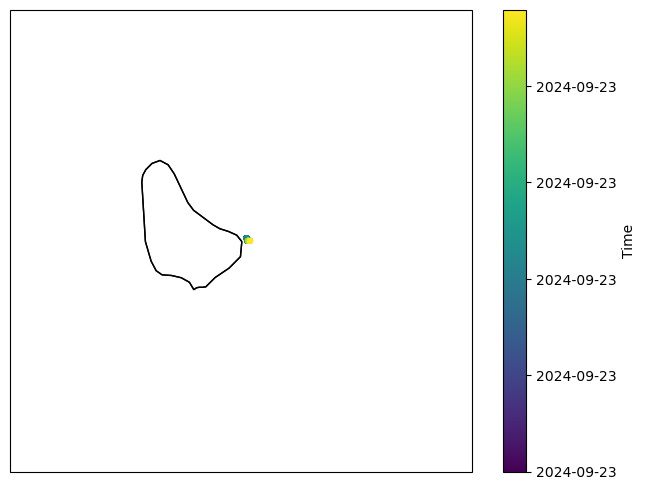

In [4]:
BCO_lon = -59.4288
BCO_lat = 13.1627

# - set control volume edges
vol_lon = [BCO_lon-0.5+360 , BCO_lon+0.5+360]  #[-60+360, -58+360]
vol_lat = [BCO_lat-0.5     , BCO_lat+0.5]  #[12.5, 14.5]



# Convert time to numeric values for coloring
time_values = meteor_cut["time"].values
time_num = mdates.date2num(time_values)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Add base features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([vol_lon[0] - 0.025, vol_lon[1] + 0.025, vol_lat[0] - 0.025, vol_lat[1] + 0.025], crs=ccrs.PlateCarree())

sc = ax.scatter(
    meteor_cut["lon"].values,
    meteor_cut["lat"].values,
    c=time_num,
    cmap="viridis",
    s=10,
    transform=ccrs.PlateCarree()
)

# Colorbar with date formatting
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Time")
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.show()


#### during 2024-09-23 , Meteor was parked in front of the BCO

In [2]:
import intake
cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/catalog.yaml")

wxt = cat.BCO.surfacemet_wxt_v1.to_dask()

## with intake v2.0 , I get an error KeyError: '.zmetadata'
# ds = xr.open_dataset("https://swift.dkrz.de/v1/dkrz_948e7d4bbfbb445fbff5315fc433e36a/airflow_production/BCO.surfacemet_wxt_v1.zarr/", engine='zarr')

#wxt = wxt.sel(time=slice('2024-09-23','2024-09-23'))



/work/mh1498/m301248/conda/envs/env_hacka/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [5]:
ds

<xarray.Dataset> Size: 5GB
Dimensions:      (time: 43362243, bnd: 2)
Coordinates:
  * time         (time) datetime64[ns] 347MB 2010-12-16T16:24:00 ... 2026-01-...
    alt          float64 8B ...
    lat          float64 8B ...
    lon          float64 8B ...
Dimensions without coordinates: bnd
Data variables: (12/22)
    DIR          (time) float32 173MB ...
    DL           (time) float32 173MB ...
    DR           (time) float32 173MB ...
    H            (time) float32 173MB ...
    HDS          (time) float32 173MB ...
    HI           (time) float32 173MB ...
    ...           ...
    TI           (time) float32 173MB ...
    VEL          (time) float32 173MB ...
    VH           (time) float32 173MB ...
    VR           (time) float32 173MB ...
    VS           (time) float32 173MB ...
    time_bounds  (time, bnd) datetime64[ns] 694MB ...
Attributes:
    Conventions:      CF-1.12
    bcoproc_version:  0.0.0.post617.dev0+72301e9
    institution:      Max Planck Institute for Meteorology, Hamburg
    license:          CC0-1.0
    location:         The Barbados Cloud Observatory, Deebles Point, Barbados...
    platform:         BCO
    source:           Vaisala WXT-520
    summary:          This dataset contains basic meteorological measurements...
    title:            WXT-2 ground station data from BCO (Level 1)
    tool_versions:    {"Python": "3.11.2 (main, Apr 28 2025, 14:11:48) [GCC 1...

In [52]:
wxt

<xarray.Dataset> Size: 933kB
Dimensions:      (time: 8640, bnd: 2)
Coordinates:
  * time         (time) datetime64[ns] 69kB 2024-09-23 ... 2024-09-23T23:59:50
    alt          float64 8B ...
    lat          float64 8B ...
    lon          float64 8B ...
Dimensions without coordinates: bnd
Data variables: (12/22)
    DIR          (time) float32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    DL           (time) float32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    DR           (time) float32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    H            (time) float32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    HDS          (time) float32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    HI           (time) float32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    ...           ...
    TI           (time) float32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    VEL          (time) float32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    VH           (time) float32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    VR           (time) float32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    VS           (time) float32 35kB dask.array<chunksize=(8640,), meta=np.ndarray>
    time_bounds  (time, bnd) datetime64[ns] 138kB dask.array<chunksize=(8640, 2), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.12
    bcoproc_version:  0.0.0.post617.dev0+72301e9
    institution:      Max Planck Institute for Meteorology, Hamburg
    license:          CC0-1.0
    location:         The Barbados Cloud Observatory, Deebles Point, Barbados...
    platform:         BCO
    source:           Vaisala WXT-520
    summary:          This dataset contains basic meteorological measurements...
    title:            WXT-2 ground station data from BCO (Level 1)
    tool_versions:    {"Python": "3.11.2 (main, Apr 28 2025, 14:11:48) [GCC 1...

In [ ]:
print(f"times between BCO and Meteo correspond: {bool(meteor_cut["wspd_rel"].time.isin(wxt["VEL"].time).all())}" )

## Meteor recordings are every 1 minute!
wxt_cut = wxt.sel(time=meteor_cut["wspd_rel"].time)
wxt_vel = wxt["VEL"].sel(time=meteor_cut["wspd_rel"].time)


times between BCO and Meteo correspond: True


##### compare low-pass versions of wind speed

In [ ]:
from functions_collector import gaussian_filter_nan

smooth_wxt = xr.apply_ufunc(
        gaussian_filter_nan,
        wxt_vel,
        kwargs={'sigma': 10, 'axis': 0, 'truncate': 4.0},
        input_core_dims=[['time']],
        output_core_dims=[['time']],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[wxt_vel.dtype]
    )


smooth_met = xr.apply_ufunc(
        gaussian_filter_nan,
        meteor_cut["wspd_rel"],
        kwargs={'sigma': 10, 'axis': 0, 'truncate': 4.0},
        input_core_dims=[['time']],
        output_core_dims=[['time']],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[meteor_cut["wspd_rel"].dtype]
    )

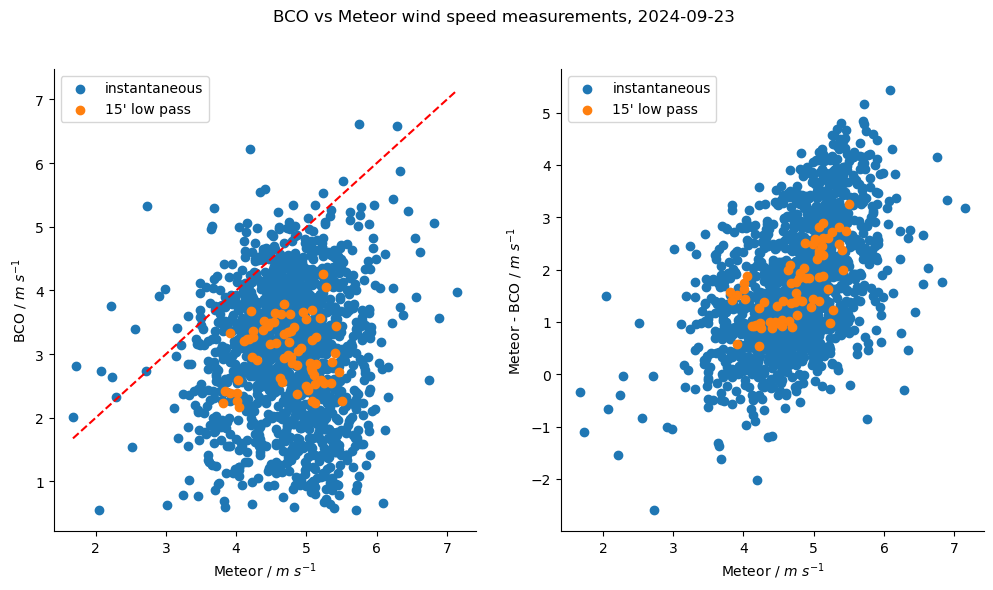

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
fig.suptitle("BCO vs Meteor wind speed measurements, 2024-09-23")

## compare actual values
x  = wxt_vel
xx = smooth_wxt[::20]

y  = meteor_cut["wspd_rel"]
yy = smooth_met[::20]
ax[0].scatter(y, x, label="instantaneous")
ax[0].scatter(yy, xx, label="15' low pass")
ax[0].plot([y.min().values, y.max().values], [y.min().values, y.max().values], "--r")

ax[0].set_xlabel(r"Meteor / $m~s^{-1}$")
ax[0].set_ylabel(r"BCO / $m~s^{-1}$")

## --- check differences in time
ax[1].scatter(y, y-x,  label="instantaneous")
ax[1].scatter(yy, yy-xx, label="15' low pass")

ax[1].set_xlabel(r"Meteor / $m~s^{-1}$")
ax[1].set_ylabel(r"Meteor - BCO / $m~s^{-1}$")

for x in ax:
    x.legend()
    for spine in ['top', 'right']:
        x.spines[spine].set_visible(False)



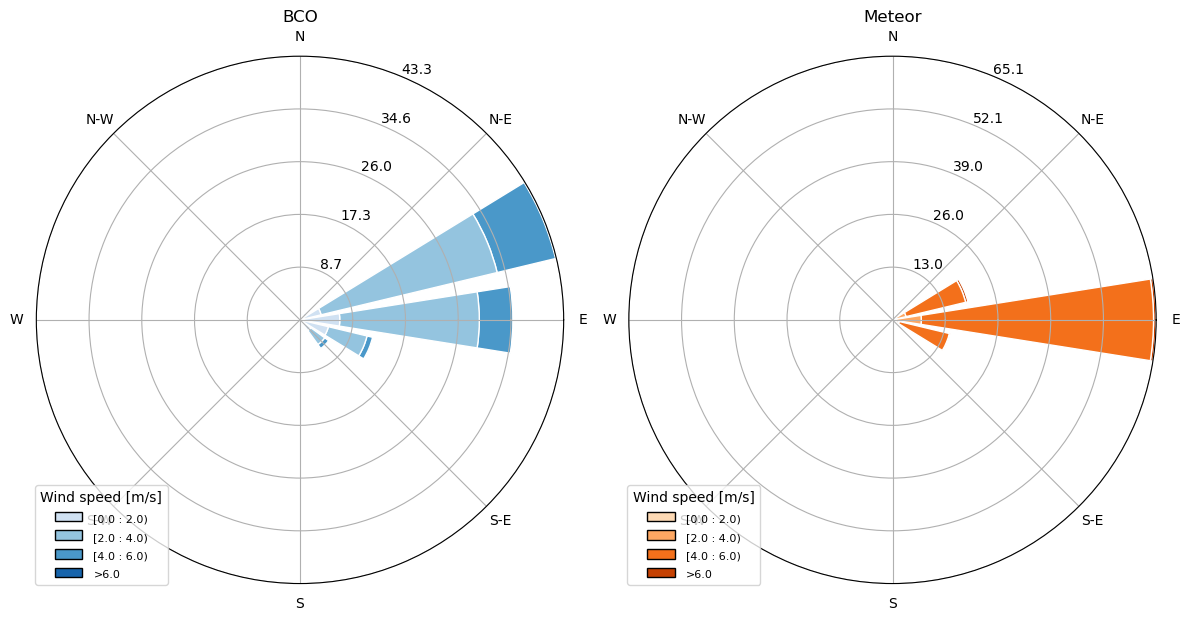

In [39]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import seaborn as sns

# optional nice color palettes
colors_bco = sns.color_palette("Blues", 4)
colors_meteor = sns.color_palette("Oranges", 4)

fig = plt.figure(figsize=(12, 6))

# ------------------ BCO ------------------
ax1 = WindroseAxes(fig, 121)
fig.add_axes(ax1)

ax1.bar(
    wxt_cut["DIR"].values,
    wxt_vel.values,
    bins=[0,2,4,6],
    normed=True,
    opening=0.8,
    edgecolor="white",
    colors=colors_bco,
)
ax1.set_title("BCO")
ax1.set_legend(title="Wind speed [m/s]")

# ------------------ Meteor ------------------
ax2 = WindroseAxes(fig, 122)
fig.add_axes(ax2)

ax2.bar(
    ds_cut["wdir"].values,
    ds_cut["wspd_rel"].values,
    bins=[0,2,4,6],
    normed=True,
    opening=0.8,
    edgecolor="white",
    colors=colors_meteor,
)
ax2.set_title("Meteor")
ax2.set_legend(title="Wind speed [m/s]")

plt.tight_layout()
plt.show()


In [32]:
ds_cut

<xarray.Dataset> Size: 464kB
Dimensions:           (time: 1380)
Coordinates:
  * time              (time) datetime64[ns] 11kB 2024-09-23 ... 2024-09-23T22...
    lat               (time) float64 11kB 13.17 13.17 13.17 ... 13.16 13.16
    lon               (time) float64 11kB -59.42 -59.42 -59.42 ... -59.41 -59.41
Data variables: (12/39)
    PM1               (time) float64 11kB ...
    PM10              (time) float64 11kB ...
    PM2p5             (time) float64 11kB ...
    lwr               (time) float64 11kB ...
    p_air             (time) float64 11kB ...
    rh_board          (time) float64 11kB ...
    ...                ...
    wdir              (time) float64 11kB ...
    wdir_rel          (time) float64 11kB ...
    wspd              (time) float64 11kB ...
    wspd_kn           (time) float64 11kB ...
    wspd_rel          (time) float64 11kB 3.595 3.832 4.811 ... 4.668 4.423
    wspd_rel_kn       (time) float64 11kB ...
Attributes:
    creator_email:  hans.segura@mpimet.mpg.de
    creator_name:   Hans Segura
    featureType:    trajectory
    history:        Converted to Zarr by Lukas Kluft (lukas.kluft@mpimet.mpg.de)
    license:        CC-BY-4.0
    platform:       RV METEOR
    project:        ORCESTRA, BOW-TIE
    source:         DVS DShip
    title:          Ship information database (DVS DShip) of METEOR cruise M203

#### compute tim spectra of the two signals

In [44]:
def power_spectrum_1d(t, x):
    import numpy as np
    import matplotlib.dates as mdates

    # If t is datetime64, convert to float days:
    if np.issubdtype(t.dtype, np.datetime64):
        t_num = mdates.date2num(t)
    else:
        t_num = t

    # Compute sampling interval
    dt = np.median(np.diff(t_num))   # time step (in days if using date2num)
    dt *= 86400                      # conversion to seconds

    # FFT frequencies
    freq = np.fft.rfftfreq(len(t), dt)

    # FFT amplitudes
    fft = np.fft.rfft(x - np.mean(x))

    # Power spectra (magnitude squared)
    P = np.abs(fft)**2

    return dt, freq, P

(0.1, 10000000.0)

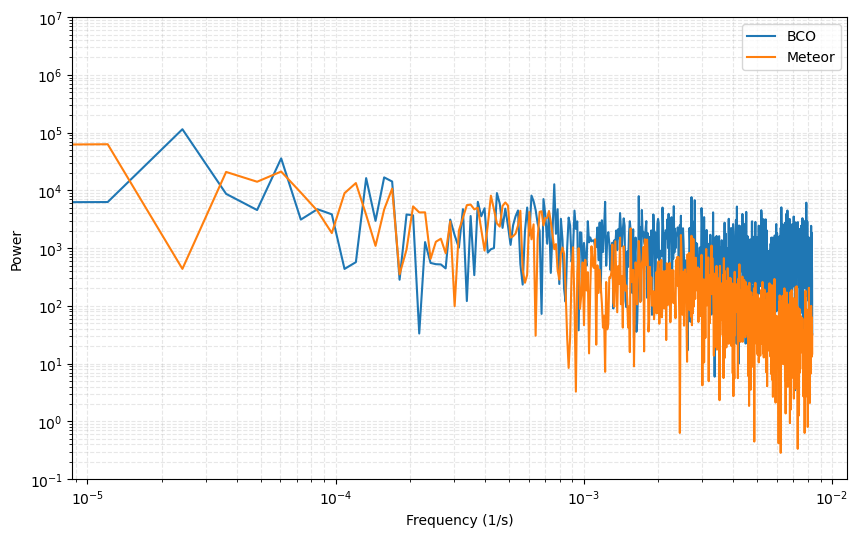

In [49]:
dt_wxt , f_wxt, P_wxt = power_spectrum_1d(wxt_vel.time.values, wxt_vel.values)
dt_met , f_met, P_met = power_spectrum_1d(ds_cut["time"].values, ds_cut["wspd_rel"].values)



plt.figure(figsize=(10, 6))
plt.loglog(f_wxt, P_wxt, label="BCO")
plt.loglog(f_met, P_met, label="Meteor")
plt.xlabel("Frequency (1/s)")
plt.ylabel("Power")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.ylim(1e-1, 1e7)

#### compare here ORCESTRA wind with surface BCO

In [3]:
rs_orcestra = xr.open_dataset("ipfs://bafybeid7cnw62zmzfgxcvc6q6fa267a7ivk2wcchbmkoyk4kdi5z2yj2w4", engine="zarr")
rs_orcestra_bco = rs_orcestra.where(((rs_orcestra["platform"] == "BCO")&(rs_orcestra["ascent_flag"]==0)), drop=True)


In [4]:
rs_orcestra_bco

<xarray.Dataset> Size: 28MB
Dimensions:            (launch_time: 141, height: 3100)
Coordinates:
  * launch_time        (launch_time) datetime64[ns] 1kB 2024-09-07T01:05:09.9...
  * height             (height) float32 12kB 0.0 10.0 ... 3.098e+04 3.099e+04
    interpolated_time  (launch_time, height) datetime64[ns] 3MB ...
    lat                (launch_time, height) float32 2MB ...
    lon                (launch_time, height) float32 2MB ...
Data variables: (12/18)
    ascent_flag        (launch_time) float32 564B 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dp                 (launch_time, height) float32 2MB nan nan nan ... nan nan
    dz                 (launch_time, height) float32 2MB nan nan nan ... nan nan
    iwv                (launch_time) float32 564B 55.54 53.01 ... 45.83 51.64
    launch_lat         (launch_time) float32 564B 13.16 13.16 ... 13.16 13.16
    launch_lon         (launch_time) float32 564B -59.43 -59.43 ... -59.43
    ...                 ...
    ta                 (launch_time, height) float32 2MB nan nan nan ... nan nan
    theta              (launch_time, height) float32 2MB nan nan nan ... nan nan
    u                  (launch_time, height) float32 2MB nan nan nan ... nan nan
    v                  (launch_time, height) float32 2MB nan nan nan ... nan nan
    wdir               (launch_time, height) float32 2MB nan nan nan ... nan nan
    wspd               (launch_time, height) float32 2MB nan nan nan ... nan nan
Attributes:
    creator_email:  marius.winkler@mpimet.mpg.de, marius.rixen@mpimet.mpg.de
    creator_name:   Marius Winkler, Marius Rixen
    featureType:    profile
    history:        Meteomodem Eoscan Software (2.1.241218); Vaisala Sounding...
    keywords:       ORCESTRA, RAPSODI, Radiosonde Profiles, Sounding, INMG, R...
    license:        CC-BY-4.0
    platform:       INMG, RV Meteor, BCO
    project:        ORCESTRA, PERCUSION, BOW-TIE, PICCOLO, SCORE, MAESTRO
    references:     https://github.com/observingClouds/pysonde
    source:         Radiosondes
    summary:        Vertical atmospheric profile, retrieved from atmospheric ...
    title:          RAPSODI Radiosonde Measurements during ORCESTRA (Level 2)

In [5]:
## radiosoundings

level2_path = "/work/mh1498/m301248/TCO_data/eurec4a_profiles_level2/EUREC4A_BCO_Vaisala-RS_L2_v3.0.0.nc"

rs_eureca = xr.open_dataset(level2_path)
rs_eureca
rs_eureca_bco = rs_eureca.where(((rs_eureca["platform"] == 1)&(rs_eureca["ascent_flag"]==1)), drop=True)

In [6]:
rs_eureca_bco

<xarray.Dataset> Size: 50MB
Dimensions:      (sounding: 182, alt: 3100, nv: 2)
Coordinates:
  * sounding     (sounding) <U40 29kB 'BCO__ascent__13.16_-59.43__20200116205...
    launch_time  (sounding) datetime64[ns] 1kB 2020-01-16T20:53:46 ... 2020-0...
  * alt          (alt) int16 6kB 0 10 20 30 40 ... 30950 30960 30970 30980 30990
    flight_time  (sounding, alt) datetime64[ns] 5MB ...
    lat          (sounding, alt) float32 2MB ...
    lon          (sounding, alt) float32 2MB ...
Dimensions without coordinates: nv
Data variables: (12/19)
    p            (sounding, alt) float32 2MB nan nan nan ... nan nan nan
    dz           (sounding, alt) float32 2MB nan nan 0.0 3.678 ... nan nan nan
    ta           (sounding, alt) float32 2MB nan nan nan 299.9 ... nan nan nan
    dp           (sounding, alt) float32 2MB nan nan 293.6 294.2 ... nan nan nan
    wspd         (sounding, alt) float32 2MB nan nan 3.7 3.636 ... nan nan nan
    u            (sounding, alt) float32 2MB nan nan -3.619 ... nan nan nan
    ...           ...
    rh           (sounding, alt) float32 2MB nan nan nan 0.7104 ... nan nan nan
    N_ptu        (sounding, alt) float32 2MB nan nan 1.0 2.0 ... nan nan nan nan
    N_gps        (sounding, alt) float32 2MB nan nan 1.0 2.0 ... nan nan nan nan
    m_ptu        (sounding, alt) float32 2MB 0.0 0.0 0.0 2.0 ... 0.0 0.0 0.0 0.0
    m_gps        (sounding, alt) float32 2MB 0.0 0.0 2.0 2.0 ... 0.0 0.0 0.0 0.0
    ascent_flag  (sounding) float32 728B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes: (12/13)
    title:            EUREC4A level 2 sounding data
    platform:         BCO
    instrument:       Radiosonde RS41-SGP by Vaisala
    doi:              10.25326/137
    created_with:     batch_interpolate_soundings.py with its last modificati...
    created_on:       Tue Dec 22 18:54:59 2020
    ...               ...
    Conventions:      CF-1.7
    campaign_id:      EUREC4A
    references:       Stephan et al. (2020): Ship- and island-based atmospher...
    acknowledgement:  The MPI-M is listed as the institute of first contact. ...
    instrument_id:    Vaisala-RS
    version:          v3.0.0

#### how many Nans ?

In [7]:
asc_or   = (rs_orcestra_bco.ascent_flag == 0) 
desc_or  = (rs_orcestra_bco.ascent_flag == 1) 

nulls_or = rs_orcestra_bco.isnull()
asc_nulls_or = nulls_or.where(asc_or, drop=True)
desc_nulls_or = nulls_or.where(desc_or, drop=True)


asc_eu   = (rs_eureca_bco.ascent_flag == 1) 
desc_eu  = (rs_eureca_bco.ascent_flag == 0) 

nulls_eu = rs_eureca_bco.isnull()
asc_nulls_eu = nulls_eu.where(asc_eu, drop=True)
desc_nulls_eu = nulls_eu.where(desc_eu, drop=True)


Text(0.5, 1.0, 'EU mr')

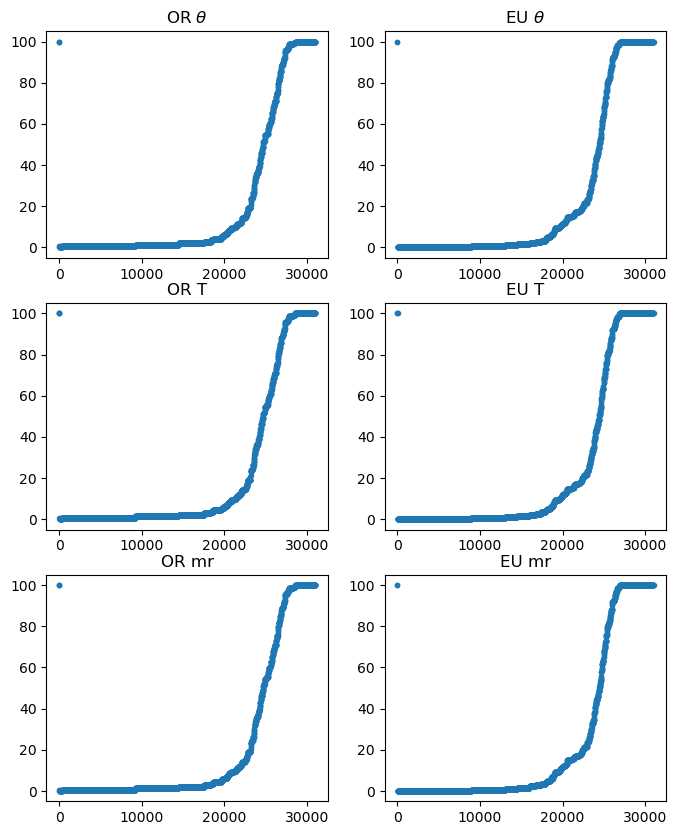

In [31]:
fig, ax = plt.subplots(3,2, figsize=(8, 10))
ax = ax.flatten()

low, upp = 0,rs_orcestra_bco.height[-1].values

##########  ORCESTRA ##########
# theta
asc_theta_nulls = asc_nulls_or.theta.sel(height=slice(low,upp))
ax[0].plot(asc_theta_nulls.height, 100*asc_theta_nulls.sum(dim="launch_time")/asc_theta_nulls.launch_time.shape[0], ".", label="ascending")

desc_theta_nulls = desc_nulls_or.theta.sel(height=slice(low,upp))
ax[0].plot(desc_theta_nulls.height, 100*desc_theta_nulls.sum(dim="launch_time")/desc_theta_nulls.launch_time.shape[0], ".", label="descending")
ax[0].set_title(r"OR $\theta$")

# temperature
asc_ta_nulls = asc_nulls_or.ta.sel(height=slice(low,upp))
ax[2].plot(asc_ta_nulls.height, 100*asc_ta_nulls.sum(dim="launch_time")/asc_ta_nulls.launch_time.shape[0], ".", label="ascending")

desc_ta_nulls = desc_nulls_or.ta.sel(height=slice(low,upp))
ax[2].plot(desc_ta_nulls.height, 100*desc_ta_nulls.sum(dim="launch_time")/desc_ta_nulls.launch_time.shape[0], ".", label="descending")
ax[2].set_title(r"OR T")

# mixing ratio
asc_mr_nulls = asc_nulls_or.mr.sel(height=slice(low,upp))
ax[4].plot(asc_mr_nulls.height, 100*asc_mr_nulls.sum(dim="launch_time")/asc_mr_nulls.launch_time.shape[0], ".", label="ascending")

desc_mr_nulls = desc_nulls_or.mr.sel(height=slice(low,upp))
ax[4].plot(desc_mr_nulls.height, 100*desc_mr_nulls.sum(dim="launch_time")/desc_mr_nulls.launch_time.shape[0], ".", label="descending")
ax[4].set_title(r"OR mr")



##########  EUREC4A ##########
# theta
asc_theta_nulls = asc_nulls_eu.theta.sel(alt=slice(low,upp))
ax[1].plot(asc_theta_nulls.alt, 100*asc_theta_nulls.sum(dim="sounding")/asc_theta_nulls.sounding.shape[0], ".", label="ascending")

desc_theta_nulls = desc_nulls_eu.theta.sel(alt=slice(low,upp))
ax[1].plot(desc_theta_nulls.alt, 100*desc_theta_nulls.sum(dim="sounding")/desc_theta_nulls.sounding.shape[0], ".", label="descending")
ax[1].set_title(r"EU $\theta$")

# temperature
asc_ta_nulls = asc_nulls_eu.ta.sel(alt=slice(low,upp))
ax[3].plot(asc_ta_nulls.alt, 100*asc_ta_nulls.sum(dim="sounding")/asc_ta_nulls.sounding.shape[0], ".", label="ascending")

desc_ta_nulls = desc_nulls_eu.ta.sel(alt=slice(low,upp))
ax[3].plot(desc_ta_nulls.alt, 100*desc_ta_nulls.sum(dim="sounding")/desc_ta_nulls.sounding.shape[0], ".", label="descending")
ax[3].set_title(r"EU T")

# mixing ratio
asc_mr_nulls = asc_nulls_eu.mr.sel(alt=slice(low,upp))
ax[5].plot(asc_mr_nulls.alt, 100*asc_mr_nulls.sum(dim="sounding")/asc_mr_nulls.sounding.shape[0], ".", label="ascending")

desc_mr_nulls = desc_nulls_eu.mr.sel(alt=slice(low,upp))
ax[5].plot(desc_mr_nulls.alt, 100*desc_mr_nulls.sum(dim="sounding")/desc_mr_nulls.sounding.shape[0], ".", label="descending")
ax[5].set_title(r"EU mr")


# for x in ax:
    # x.set_ylim(0,0.8)
    # x.set_xlim(0,50)


# plt.legend()


# plt.gca().set_xlabel(r"height / $m$")
# plt.gca().set_ylabel(r"% sounding")
# plt.gca().set_title("% of soundings with Nan at each height")
# plt.gca().legend()

# for spine in ['top', 'right']:
#     plt.gca().spines[spine].set_visible(False)

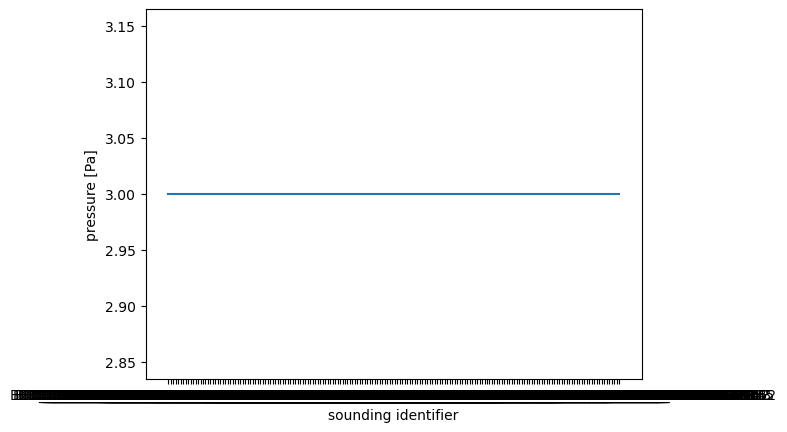

In [26]:
asc_nulls_eu.p.sel(alt=slice(0, 3e3)).sum(dim="alt").plot(x="sounding")

In [24]:
import intake

# if True:
#     wxt = xr.open_dataset("https://swift.dkrz.de/v1/dkrz_948e7d4bbfbb445fbff5315fc433e36a/airflow_production/BCO.surfacemet_wxt_v1.zarr/", engine='zarr')

# else:
cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/catalog.yaml")
wxt = cat.BCO.surfacemet_wxt_v1.to_dask()


wxt_radio = wxt.sel(time=slice(rs_orcestra_bco.launch_time[0],
                               rs_orcestra_bco.launch_time[-1]))

/work/mh1498/m301248/conda/envs/env_hacka/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [25]:
smooth_wind_wxt_radio = xr.apply_ufunc(
    gaussian_filter_nan,
    wxt_radio.VEL.chunk({'time': -1}),
    kwargs={'sigma': 60, 'axis': 0, 'truncate': 4.0},
    input_core_dims=[['time']],
    output_core_dims=[['time']],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[wxt_radio.VEL.dtype]
)

p EU under 5% True ---- p OR under 5% True


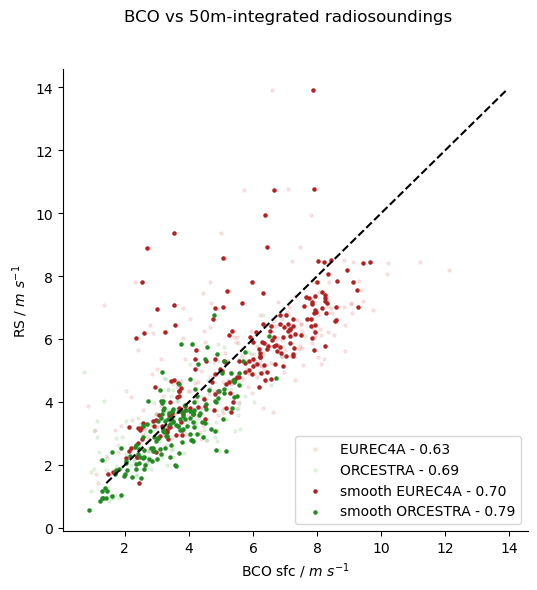

In [67]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
fig.suptitle("BCO vs 50m-integrated radiosoundings")

from functions_collector import xr_pearsonr

## compare actual values
## --- eureca
x        = wxt_eu.VEL.sel(time=rs_eureca_bco.launch_time, method='nearest')
smooth_x = smooth_wxt_eu.sel(time=rs_eureca_bco.launch_time, method='nearest')
y        = rs_eureca_bco.wspd.sel(alt=slice(0,50)).mean(dim="alt")

## --- orcestra
xx        = wxt_or.VEL.sel(time=rs_orcestra_bco.launch_time, method="nearest")
smooth_xx = smooth_wxt_or.sel(time=rs_orcestra_bco.launch_time, method='nearest')
yy        = rs_orcestra_bco.wspd.sel(height=slice(0,50)).mean(dim="height")

## --- compute correlations
r_eu, p_eu = xr_pearsonr(x, y, dim="sounding")
r_or, p_or = xr_pearsonr(xx, yy, dim="launch_time")

smooth_r_eu, smooth_p_eu = xr_pearsonr(smooth_x, y, dim="sounding")
smooth_r_or, smooth_p_or = xr_pearsonr(smooth_xx, yy, dim="launch_time")

## --- plotting
ax.scatter(x, y,   s=5, color="tab:red",  label=f"EUREC4A - {r_eu.values:.2f}", alpha=0.1)
ax.scatter(xx, yy, s=5, color="tab:green", label=f"ORCESTRA - {r_or.values:.2f}", alpha=0.1)

ax.scatter(smooth_x,   y, s=5, color="firebrick",  label=f"smooth EUREC4A - {smooth_r_eu.values:.2f}")
ax.scatter(smooth_xx, yy, s=5, color="forestgreen", label=f"smooth ORCESTRA - {smooth_r_or.values:.2f}")

ax.plot([y.min().values, y.max().values], [y.min().values, y.max().values], "--k")

ax.set_xlabel(r"BCO sfc / $m~s^{-1}$")
ax.set_ylabel(r"RS / $m~s^{-1}$")

ax.legend()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

print(f"p EU under 5% {p_eu.values < 0.05} ---- p OR under 5% {p_or.values < 0.05}")

#### draw same comparison for T and q
* BCO sfc vs Meteor
* BCO profiles vs Meteor (already in Winkler et al 25)

In [26]:
temp = wxt_radio['T'] + 273.15  ## deg K
rh   = wxt_radio['RH']/100.     ## values betwen 0 and 1
sfc_pressure = wxt_radio['P']   ## already in hPa

wxt_theta = temp*((1000/sfc_pressure)**(0.286))

from functions_collector import mr_from_rh

wxt_mr = mr_from_rh(temp, sfc_pressure, rh)

In [27]:
smooth_mr_wxt_radio = xr.apply_ufunc(
        gaussian_filter_nan,
        wxt_mr.chunk({'time': -1}),
        kwargs={'sigma': 60, 'axis': 0, 'truncate': 4.0},
        input_core_dims=[['time']],
        output_core_dims=[['time']],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[wxt_mr.dtype]
    )

smooth_theta_wxt_radio = xr.apply_ufunc(
        gaussian_filter_nan,
        wxt_theta.chunk({'time': -1}),
        kwargs={'sigma': 60, 'axis': 0, 'truncate': 4.0},
        input_core_dims=[['time']],
        output_core_dims=[['time']],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[wxt_theta.dtype]
    )

p Theta under 5% True
p MR under 5% True


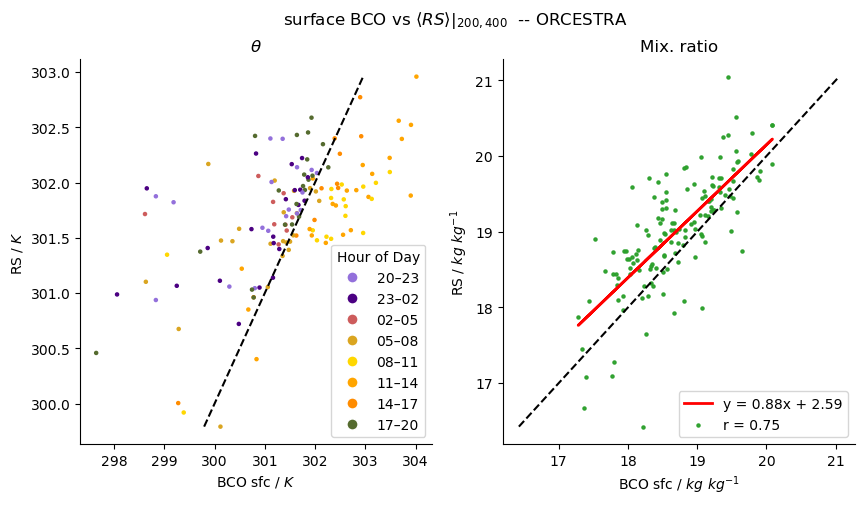

In [30]:
import matplotlib.cm as cm

fig, ax = plt.subplots(1,2,figsize=(10,5))
low, upp = [200, 400]
fig.suptitle(fr"surface BCO vs $\langle RS \rangle |_{{{low},{upp}}}$  -- ORCESTRA")


## potential temperature
x        = wxt_theta.sel(time=rs_orcestra_bco.launch_time, method='nearest')
smooth_x = smooth_theta_wxt_radio.sel(time=rs_orcestra_bco.launch_time, method='nearest')
y        = rs_orcestra_bco.theta.sel(height=slice(low,upp)).mean(dim="height")

## compute correlation index and its significance
r, p = xr_pearsonr(x, y, dim="launch_time")
smooth_r, smooth_p = xr_pearsonr(smooth_x, y, dim="launch_time")

print(f"p Theta under 5% {p.values < 0.05}")



## checl whether there is sistematicity with hour of day
hours    = y['launch_time'].dt.hour

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

colors =  [
    "mediumpurple", 
    "indigo",
    "indianred",
    "goldenrod",
    "gold",
    "orange",
    "darkorange",
    "darkolivegreen"
]

# assign each point to a bin
bin_index = np.digitize(hours, bins, right=False) - 1
point_colors = [colors[i] for i in bin_index]




ax[0].scatter(x, y,   s=5, c=point_colors,  label=f"Theta - {r.values:.2f}", alpha=1)
# ax[0].scatter(smooth_x,   y, s=5, color="forestgreen",  label=f"smooth Theta - {smooth_r.values:.2f}")

# - 1-to-1 line
ax[0].plot([y.min().values, y.max().values], [y.min().values, y.max().values], "--k")

ax[0].set_xlabel(r"BCO sfc / $K$")
ax[0].set_ylabel(r"RS / $K$")
ax[0].set_title(r"$\theta$")

### legend for time intervals ###
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=8, label='20–23'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=8, label='23–02'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[2], markersize=8, label='02–05'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[3], markersize=8, label='05–08'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[4], markersize=8, label='08–11'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[5], markersize=8, label='11–14'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[6], markersize=8, label='14–17'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[7], markersize=8, label='17–20')

]

ax[0].legend(handles=legend_elements, title="Hour of Day", loc='lower right') #, frameon=True, fancybox=True, shadow=True)





## mixing ratio
x        = wxt_mr.sel(time=rs_orcestra_bco.launch_time, method='nearest')*1e3   # g / kg
# smooth_x = smooth_mr_wxt_radio.sel(time=rs_orcestra_bco.launch_time, method='nearest')*1e3   # g / kg
y        = rs_orcestra_bco.mr.sel(height=slice(low,upp)).mean(dim="height")*1e3   # g / kg

# with "my own" functions
r, p = xr_pearsonr(x, y, dim="launch_time")
# smooth_r, smooth_p = xr_pearsonr(smooth_x, y, dim="launch_time")
print(f"p MR under 5% {p.values < 0.05}")

# check regression line
from scipy.stats import linregress
slope, intercept, _, _, std_err = linregress(x.values, y.values)
y_pred = slope*x + intercept

# Plot the regression line
ax[1].plot(x, y_pred, label=f'y = {slope:.2f}x + {intercept:.2f}', color='red', lw=2)




ax[1].scatter(x, y,   s=5, color="tab:green",  label=f"r = {r.values:.2f}", alpha=0.95)
# ax[1].scatter(smooth_x,   y, s=5, color="forestgreen",  label=f"smooth mr - {smooth_r.values:.2f}")

# - 1-to-1 line
ax[1].plot([y.min().values, y.max().values], [y.min().values, y.max().values], "--k")

ax[1].set_xlabel(r"BCO sfc / $kg~kg^{-1}$")
ax[1].set_ylabel(r"RS / $kg~kg^{-1}$")
ax[1].set_title(r"Mix. ratio")
ax[1].legend(loc="lower right")

for axis in ax:
    for spine in ['top', 'right']:
        axis.spines[spine].set_visible(False)


In [31]:
len(point_colors)

141

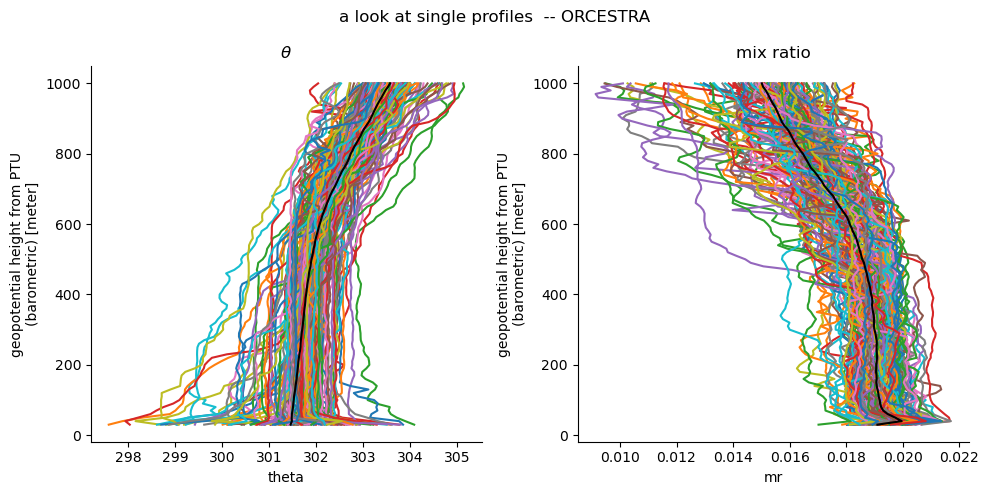

In [18]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle(fr"a look at single profiles  -- ORCESTRA")

rs_orcestra_bco.theta.sel(height=slice(30,1000)).plot.line(ax=ax[0], y="height", add_legend=False)
rs_orcestra_bco.theta.sel(height=slice(30,1000)).mean(dim="launch_time").plot.line(ax=ax[0], y="height", color="black")
ax[0].set_title(r"$\theta$")

rs_orcestra_bco.mr.sel(height=slice(30,1000)).plot.line(ax=ax[1], y="height", add_legend=False)
rs_orcestra_bco.mr.sel(height=slice(30,1000)).mean(dim="launch_time").plot.line(ax=ax[1], y="height", color="black")
ax[1].set_title(r"mix ratio")


for axis in ax:
    for spine in ['top', 'right']:
        axis.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

### classify Radiosondes profiles based on wind speed - OR

In [3]:
# --- things I will need later
cp = 1004   # J / Kg K
Lv = 2.5e6  # J / Kg
grav  = 9.81   # m / s^2

## open RAPSODI dataset - selecting only ascending RS from BCO
rs_orcestra = xr.open_dataset("ipfs://bafybeid7cnw62zmzfgxcvc6q6fa267a7ivk2wcchbmkoyk4kdi5z2yj2w4", engine="zarr")
rs_orcestra_bco = rs_orcestra.where(((rs_orcestra["platform"] == "BCO")&(rs_orcestra["ascent_flag"]==0)), drop=True)

# select profiles above 50 m
rs_orcestra_bco = rs_orcestra_bco.where(rs_orcestra_bco.height>50, drop=True)

## open BCO surface wind speed
import intake
cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/catalog.yaml")


import pandas as pd

start, end = rs_orcestra_bco.launch_time[0] - pd.Timedelta("2H"), rs_orcestra_bco.launch_time[-1] + pd.Timedelta("2H")

wxt = cat.BCO.surfacemet_wxt_v1.to_dask()
wxt_radio = wxt.sel(time=slice(start,end))


/tmp/ipykernel_3551796/355762211.py:20: Pandas4Warning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  start, end = rs_orcestra_bco.launch_time[0] - pd.Timedelta("2H"), rs_orcestra_bco.launch_time[-1] + pd.Timedelta("2H")
/work/mh1498/m301248/conda/envs/env_hacka/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [4]:
rs_orcestra_bco

<xarray.Dataset> Size: 42MB
Dimensions:            (launch_time: 141, height: 3094)
Coordinates:
  * launch_time        (launch_time) datetime64[ns] 1kB 2024-09-07T01:05:09.9...
  * height             (height) float32 12kB 60.0 70.0 ... 3.098e+04 3.099e+04
    interpolated_time  (launch_time, height) datetime64[ns] 3MB ...
    lat                (launch_time, height) float32 2MB ...
    lon                (launch_time, height) float32 2MB ...
Data variables: (12/18)
    ascent_flag        (launch_time, height) float32 2MB 0.0 0.0 0.0 ... 0.0 0.0
    dp                 (launch_time, height) float32 2MB 296.9 296.9 ... nan nan
    dz                 (launch_time, height) float32 2MB 4.314 4.563 ... nan nan
    iwv                (launch_time, height) float32 2MB 55.54 55.54 ... 51.64
    launch_lat         (launch_time, height) float32 2MB 13.16 13.16 ... 13.16
    launch_lon         (launch_time, height) float32 2MB -59.43 ... -59.43
    ...                 ...
    ta                 (launch_time, height) float32 2MB 300.3 300.5 ... nan nan
    theta              (launch_time, height) float32 2MB 299.9 300.2 ... nan nan
    u                  (launch_time, height) float32 2MB 1.808 1.899 ... nan nan
    v                  (launch_time, height) float32 2MB 1.818 2.0 ... nan nan
    wdir               (launch_time, height) float32 2MB 224.8 223.5 ... nan nan
    wspd               (launch_time, height) float32 2MB 2.564 2.758 ... nan nan
Attributes:
    creator_email:  marius.winkler@mpimet.mpg.de, marius.rixen@mpimet.mpg.de
    creator_name:   Marius Winkler, Marius Rixen
    featureType:    profile
    history:        Meteomodem Eoscan Software (2.1.241218); Vaisala Sounding...
    keywords:       ORCESTRA, RAPSODI, Radiosonde Profiles, Sounding, INMG, R...
    license:        CC-BY-4.0
    platform:       INMG, RV Meteor, BCO
    project:        ORCESTRA, PERCUSION, BOW-TIE, PICCOLO, SCORE, MAESTRO
    references:     https://github.com/observingClouds/pysonde
    source:         Radiosondes
    summary:        Vertical atmospheric profile, retrieved from atmospheric ...
    title:          RAPSODI Radiosonde Measurements during ORCESTRA (Level 2)

In [5]:
vel = wxt_radio["VEL"]
hourly_vel = wxt_radio["VEL"].resample(time="1h").mean()

temp = wxt_radio['T'].resample(time="1h").mean() + 273.15    ## deg K
rh   = (wxt_radio['RH']/100.).resample(time="1h").mean()     ## values betwen 0 and 1

sfc_pressure = wxt_radio['P'].resample(time="1h").mean()    ## already in hPa
from functions_collector import mr_from_rh

# temp is already in Kelvin
# press is already in mb
# rh was converted between 0 nd 1
mr = mr_from_rh(temp, sfc_pressure, rh)

Text(0.5, 1.0, 'Hourly wind speed and RS launches')

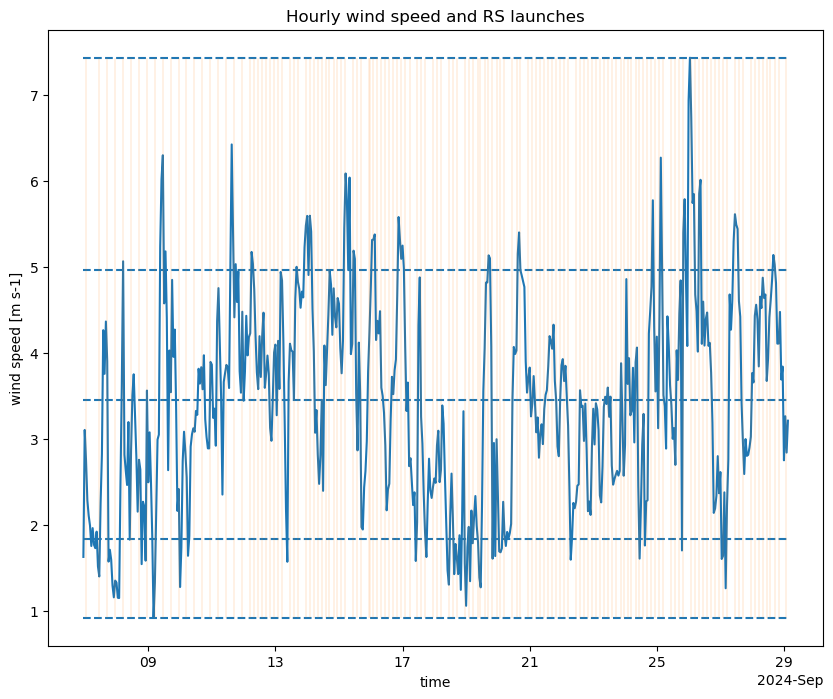

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

hourly_vel.plot.line(ax=ax, x="time")
qs = hourly_vel.quantile([0, 0.1, 0.5, 0.9, 1.0])

# Horizontal lines across full time range
ax.hlines(
    y=qs.values,
    xmin=hourly_vel.time.min().values,
    xmax=hourly_vel.time.max().values,
    linestyles="dashed",
)

ax.vlines(
    x=rs_orcestra_bco.launch_time.values,
    ymin=float(hourly_vel.min()),
    ymax=float(hourly_vel.max()),
    color="tab:orange",
    linewidths=0.15
)



ax.set_title(r"Hourly wind speed and RS launches")

In [7]:
mse_prf     = cp*rs_orcestra_bco["ta"] + Lv*rs_orcestra_bco["mr"] + grav*rs_orcestra_bco["mr"].height
sat_mse_prf = cp*rs_orcestra_bco["ta"] + (Lv*rs_orcestra_bco["mr"] / rs_orcestra_bco["rh"]) + grav*rs_orcestra_bco["mr"].height

sfc_mse, sfc_sat_mse = cp*temp + Lv*mr ,  cp*temp + Lv*mr/rh

mse_prf, sat_mse_prf = mse_prf.where(mse_prf.height>20, drop=True), sat_mse_prf.where(sat_mse_prf.height>20, drop=True)

In [9]:
quantile_ranges = {'low': [0.00, 0.10], 'mid': [0.45, 0.55], 'high': [0.90, 1.00]}
resulting_wind_bins = {'low': [], 'mid': [], 'high': []}
mse_prf_orc, sat_mse_prf_orc, rh_prf_orc = {}, {}, {}
sfc_mse_orc, sfc_sat_mse_orc, sfc_rh_orc = {}, {}, {}


## add also profiles of RH and saturated MSE

for key, (q_low, q_high) in quantile_ranges.items():
    q_min, q_max = hourly_vel.quantile([q_low, q_high]).values
    resulting_wind_bins[key] = [q_min, q_max]
    mask = ((hourly_vel >= q_min) & (hourly_vel <= q_max)).compute()
    valid_times = hourly_vel.time.where(mask, drop=True)

    ## select nearest profiles to hourly wind estimates
    mse_prf_orc[key] = mse_prf.sel(launch_time=valid_times.values, method="nearest")
    sat_mse_prf_orc[key] = sat_mse_prf.sel(launch_time=valid_times.values, method="nearest")
    rh_prf_orc[key] = rs_orcestra_bco["rh"].sel(launch_time=valid_times.values, method="nearest")
    
    ## surface values for reference
    sfc_mse_orc[key] = sfc_mse.sel(time=valid_times.values, method="nearest")
    sfc_sat_mse_orc[key] = sfc_sat_mse.sel(time=valid_times.values, method="nearest")
    sfc_rh_orc[key] = rh.sel(time=valid_times.values, method="nearest")

    
# low_mse_prof_as = mse_prf_orc['low']
# mid_mse_prof_as = mse_prf_orc['mid']
# high_mse_prof_as = mse_prf_orc['high']

In [10]:
mse_prf_orc_median, sat_mse_prf_orc_median, rh_prf_orc_median = {}, {}, {}
sfc_mse_orc_median, sfc_sat_mse_orc_median, sfc_rh_orc_median = {}, {}, {}


median_wind = hourly_vel.quantile(0.5).values
mask_above = (hourly_vel >= median_wind).compute()
mask_below = (hourly_vel < median_wind).compute()
times_above = hourly_vel.time.where(mask_above, drop=True)
times_below = hourly_vel.time.where(mask_below, drop=True)

## select profiles based on median
mse_prf_orc_median["below"] = mse_prf.sel(launch_time=times_below.values, method="nearest")
mse_prf_orc_median["above"] = mse_prf.sel(launch_time=times_above.values, method="nearest")

sat_mse_prf_orc_median["below"] = sat_mse_prf.sel(launch_time=times_below.values, method="nearest")
sat_mse_prf_orc_median["above"] = sat_mse_prf.sel(launch_time=times_above.values, method="nearest")

rh_prf_orc_median["below"] = rs_orcestra_bco["rh"].sel(launch_time=times_below.values, method="nearest")
rh_prf_orc_median["above"] = rs_orcestra_bco["rh"].sel(launch_time=times_above.values, method="nearest")


## surface values for reference

sfc_mse_orc_median["below"] = sfc_mse.sel(time=times_below.values, method="nearest")
sfc_mse_orc_median["above"] = sfc_mse.sel(time=times_above.values, method="nearest")

sfc_sat_mse_orc_median["below"] = sfc_sat_mse.sel(time=times_below.values, method="nearest")
sfc_sat_mse_orc_median["above"] = sfc_sat_mse.sel(time=times_above.values, method="nearest")

sfc_rh_orc_median["below"] = rh.sel(time=times_below.values, method="nearest")
sfc_rh_orc_median["above"] = rh.sel(time=times_above.values, method="nearest")


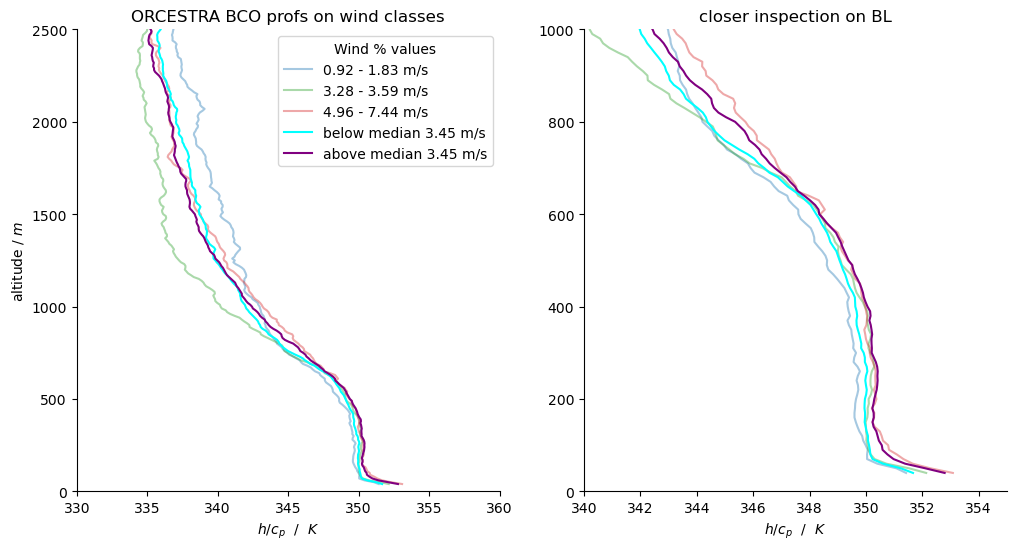

In [11]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(1,2, figsize=(12,6))

cols = {"low wind":"tab:blue",
        "mid wind":"tab:green",
        "high wind":"tab:red"}

## percentile based
(mse_prf_orc['low']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"{resulting_wind_bins["low"][0]:.2f} - {resulting_wind_bins["low"][1]:.2f} m/s", color=cols['low wind'], alpha=0.4)
(mse_prf_orc['mid']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"{resulting_wind_bins["mid"][0]:.2f} - {resulting_wind_bins["mid"][1]:.2f} m/s", color=cols["mid wind"], alpha=0.4)
(mse_prf_orc['high']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"{resulting_wind_bins["high"][0]:.2f} - {resulting_wind_bins["high"][1]:.2f} m/s", color=cols["high wind"], alpha=0.4)

# median based profiles
(mse_prf_orc_median['below']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"below median {median_wind:.2f} m/s", color="cyan")
(mse_prf_orc_median['above']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"above median {median_wind:.2f} m/s", color="purple")

ax[0].set_ylim(0,2500)
ax[0].set_xlim(330,360)


## ------  closer inspection on BL  ----------
(mse_prf_orc['low']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[1], y="height", label=f"{resulting_wind_bins["low"][0]:.2f} - {resulting_wind_bins["low"][1]:.2f} m/s", color=cols['low wind'], alpha=0.4)
(mse_prf_orc['mid']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[1], y="height", label=f"{resulting_wind_bins["mid"][0]:.2f} - {resulting_wind_bins["mid"][1]:.2f} m/s", color=cols["mid wind"], alpha=0.4)
(mse_prf_orc['high']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[1], y="height", label=f"{resulting_wind_bins["high"][0]:.2f} - {resulting_wind_bins["high"][1]:.2f} m/s", color=cols["high wind"], alpha=0.4)

## median based profiles
(mse_prf_orc_median['below']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[1], y="height", label=f"below median {median_wind:.2f} m/s", color="cyan")
(mse_prf_orc_median['above']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[1], y="height", label=f"above median {median_wind:.2f} m/s", color="purple")

ax[1].set_ylim(0,1000)
ax[1].set_xlim(340,355)
ax[1].set_title("closer inspection on BL")
ax[1].set_ylabel(r"")



for x in ax:
        for spine in ['top', 'right']:
                x.spines[spine].set_visible(False)
                x.set_xlabel(r"$h/c_p$  /  $K$")

ax[0].set_ylabel(r"altitude / $m$")
ax[0].set_title("ORCESTRA BCO profs on wind classes")
ax[0].legend(loc="upper right", title="Wind % values")



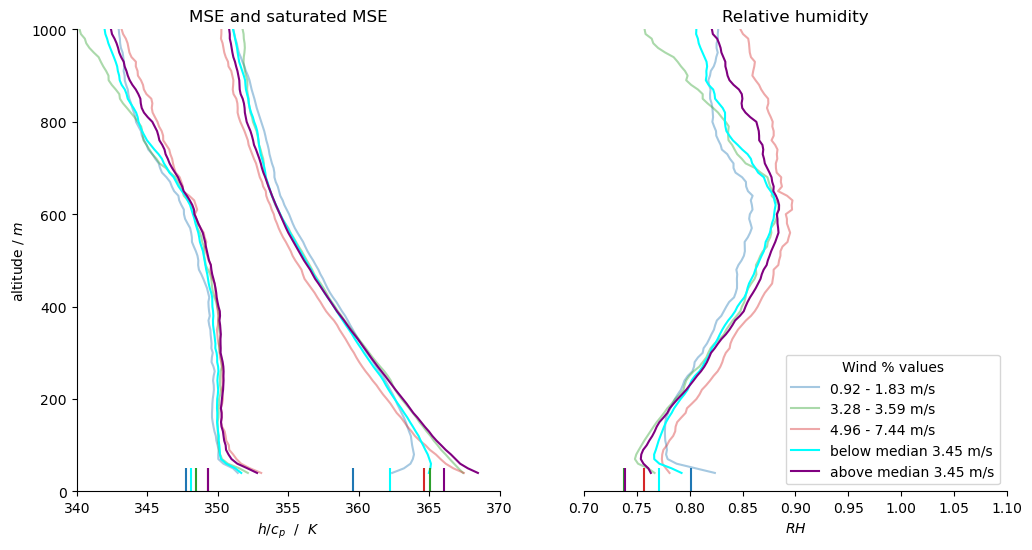

In [12]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(1,2, figsize=(12,6))

cols = {"low wind":"tab:blue",
        "mid wind":"tab:green",
        "high wind":"tab:red"}


## ------  closer inspection on BL  ---------- ##

## MSE 
(mse_prf_orc['low']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"{resulting_wind_bins["low"][0]:.2f} - {resulting_wind_bins["low"][1]:.2f} m/s", color=cols['low wind'], alpha=0.4)
(mse_prf_orc['mid']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"{resulting_wind_bins["mid"][0]:.2f} - {resulting_wind_bins["mid"][1]:.2f} m/s", color=cols["mid wind"], alpha=0.4)
(mse_prf_orc['high']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"{resulting_wind_bins["high"][0]:.2f} - {resulting_wind_bins["high"][1]:.2f} m/s", color=cols["high wind"], alpha=0.4)

# - median based profiles
(mse_prf_orc_median['below']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"below median {median_wind:.2f} m/s", color="cyan")
(mse_prf_orc_median['above']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"above median {median_wind:.2f} m/s", color="purple")

# surface: low, mmid, high and median
ax[0].vlines([(sfc_mse_orc["low"]/cp).mean(dim="time", skipna=True), 
              (sfc_mse_orc["mid"]/cp).mean(dim="time", skipna=True),
              (sfc_mse_orc["high"]/cp).mean(dim="time", skipna=True)], 
              ymin=0, ymax=50, 
              color = [cols["low wind"], cols["mid wind"], cols["high wind"]])

ax[0].vlines([(sfc_mse_orc_median["below"]/cp).mean(dim="time", skipna=True), 
              (sfc_mse_orc_median["above"]/cp).mean(dim="time", skipna=True)], 
              ymin=0, ymax=50, 
              color=["cyan", "purple"])



## sat MSE
(sat_mse_prf_orc['low']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"{resulting_wind_bins["low"][0]:.2f} - {resulting_wind_bins["low"][1]:.2f} m/s", color=cols['low wind'], alpha=0.4)
(sat_mse_prf_orc['mid']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"{resulting_wind_bins["mid"][0]:.2f} - {resulting_wind_bins["mid"][1]:.2f} m/s", color=cols["mid wind"], alpha=0.4)
(sat_mse_prf_orc['high']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"{resulting_wind_bins["high"][0]:.2f} - {resulting_wind_bins["high"][1]:.2f} m/s", color=cols["high wind"], alpha=0.4)

# - median based profiles
(sat_mse_prf_orc_median['below']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"below median {median_wind:.2f} m/s", color="cyan")
(sat_mse_prf_orc_median['above']/cp).mean(dim="launch_time", skipna=True).plot.line(ax=ax[0], y="height", label=f"above median {median_wind:.2f} m/s", color="purple")

# surface
ax[0].vlines([(sfc_sat_mse_orc["low"]/cp).mean(dim="time", skipna=True), 
              (sfc_sat_mse_orc["mid"]/cp).mean(dim="time", skipna=True),
              (sfc_sat_mse_orc["high"]/cp).mean(dim="time", skipna=True)], 
              ymin=0, ymax=50, 
              color = [cols["low wind"], cols["mid wind"], cols["high wind"]])

ax[0].vlines([(sfc_sat_mse_orc_median["below"]/cp).mean(dim="time", skipna=True), 
              (sfc_sat_mse_orc_median["above"]/cp).mean(dim="time", skipna=True)], 
              ymin=0, ymax=50, 
              color=["cyan", "purple"])



ax[0].set_title("MSE and saturated MSE")
ax[0].set_xlabel(r"$h/c_p$  /  $K$")
ax[0].set_ylabel(r"altitude / $m$")
ax[0].set_xlim(340,370)




## --  RH on second axis -- ##
(rh_prf_orc['low']).mean(dim="launch_time", skipna=True).plot.line(ax=ax[1], y="height", label=f"{resulting_wind_bins["low"][0]:.2f} - {resulting_wind_bins["low"][1]:.2f} m/s", color=cols['low wind'], alpha=0.4)
(rh_prf_orc['mid']).mean(dim="launch_time", skipna=True).plot.line(ax=ax[1], y="height", label=f"{resulting_wind_bins["mid"][0]:.2f} - {resulting_wind_bins["mid"][1]:.2f} m/s", color=cols["mid wind"], alpha=0.4)
(rh_prf_orc['high']).mean(dim="launch_time", skipna=True).plot.line(ax=ax[1], y="height", label=f"{resulting_wind_bins["high"][0]:.2f} - {resulting_wind_bins["high"][1]:.2f} m/s", color=cols["high wind"], alpha=0.4)

# - median based profiles
(rh_prf_orc_median['below']).mean(dim="launch_time", skipna=True).plot.line(ax=ax[1], y="height", label=f"below median {median_wind:.2f} m/s", color="cyan")
(rh_prf_orc_median['above']).mean(dim="launch_time", skipna=True).plot.line(ax=ax[1], y="height", label=f"above median {median_wind:.2f} m/s", color="purple")

# surface
ax[1].vlines([(sfc_rh_orc["low"]).mean(dim="time", skipna=True), 
              (sfc_rh_orc["mid"]).mean(dim="time", skipna=True),
              (sfc_rh_orc["high"]).mean(dim="time", skipna=True)], 
              ymin=0, ymax=50, 
              color = [cols["low wind"], cols["mid wind"], cols["high wind"]])

ax[1].vlines([(sfc_rh_orc_median["below"]).mean(dim="time", skipna=True), 
              (sfc_rh_orc_median["above"]).mean(dim="time", skipna=True)], 
              ymin=0, ymax=50, 
              color=["cyan", "purple"])



ax[1].set_title("Relative humidity")
ax[1].set_xlabel(r"$RH$")
ax[1].set_xlim(0.7,1.1)
ax[1].legend(loc="lower right", title="Wind % values")


ax[1].yaxis.set_visible(False)
ax[1].spines["left"].set_visible(False)
for x in ax:
        x.set_ylim(0,1000)
        for spine in ['top', 'right']:
                x.spines[spine].set_visible(False)
                

### turn to ceilometer - Fig. 1 of Albright, Stevens and Wirth 2025

In [8]:
path_to_ceilo = "/work/pd1327/OBS/BARBADOS_CLOUD_OBSERVATORY/Level_1/A_Cloud_base_heights/CEILO__CHM15k_MPI__CBH__10s__202408.nc"
ceilo1 = xr.open_dataset(path_to_ceilo)
path_to_ceilo = "/work/pd1327/OBS/BARBADOS_CLOUD_OBSERVATORY/Level_1/A_Cloud_base_heights/CEILO__CHM15k_MPI__CBH__10s__202409.nc"
ceilo2 = xr.open_dataset(path_to_ceilo)
ceilo = xr.concat([ceilo1, ceilo2], dim="time")

ceilo['time'] = ceilo['time'].astype('datetime64[ns]')
ceilo = ceilo.sortby('time')

import pandas as pd

start, end = rs_orcestra_bco.launch_time[0] - pd.Timedelta("2H"), rs_orcestra_bco.launch_time[-1] + pd.Timedelta("2H")
ceilo = ceilo.sel(time=slice(start,end ))

ceilo

/tmp/ipykernel_3551796/1919663803.py:5: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ceilo = xr.concat([ceilo1, ceilo2], dim="time")
/tmp/ipykernel_3551796/1919663803.py:12: Pandas4Warning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  start, end = rs_orcestra_bco.launch_time[0] - pd.Timedelta("2H"), rs_orcestra_bco.launch_time[-1] + pd.Timedelta("2H")


<xarray.Dataset> Size: 12MB
Dimensions:               (time: 191796)
Coordinates:
  * time                  (time) datetime64[ns] 2MB 2024-09-06T23:05:09.99298...
Data variables:
    bco_day               (time) datetime64[ns] 2MB 2024-09-06T23:05:09.99298...
    YYYYMMDDHH            (time) float64 2MB 2.024e+09 2.024e+09 ... 2.024e+09
    cbh_1                 (time) float32 767kB 501.5 501.5 nan ... nan nan nan
    cbh_2s_1              (time) float32 767kB 1.243e+03 nan ... nan nan
    flag_ceilo_status     (time) int32 767kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    cbh_jenoptik_1        (time) float32 767kB 1.263e+03 1.268e+03 ... nan nan
    flag_jenoptik_output  (time) int32 767kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    flag_rain             (time) float64 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    flag_mrr_status       (time) int32 767kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    lat                   (time) float32 767kB 13.16 13.16 13.16 ... 13.16 13.16
    lon                   (time) float32 767kB -59.43 -59.43 ... -59.43 -59.43
Attributes: (12/13)
    title:          Cloud base height estimates and rain flag from ceilometer...
    author:         Louise Nuijens (louise.nuijens@mpimet.mpg.de)
    institution:    Max Planck Institute for Meteorology
    location:       Barbados Cloud Observatory, Deebles Point, Barbados, West...
    resolution:     Temporal resolution = 10 seconds. Vertical resolution = 1...
    details_rain:   Rain flag is 1 when rain-rate > 0.05 mm/hr in five or mor...
    ...             ...
    source:         Ceilometer profiles of backscattered photons in PR^2, cor...
    instrument:     Jenoptik CHM 15k(X) ceilometer and MeTeK micro-rain radar...
    converted_by:   Hauke Schulz (hauke.schulz@mpimet.mpg.de)
    created_with:   get_cloudbaseheight.ncl with its last modification on 202...
    creation_date:  Fri 18 Oct 2024 10:29:56 AM CEST
    version:        1.1.1; git:tag 1.1.1/commit after 98d8f60d

Text(0, 0.5, 'cbh_1 (bins)')

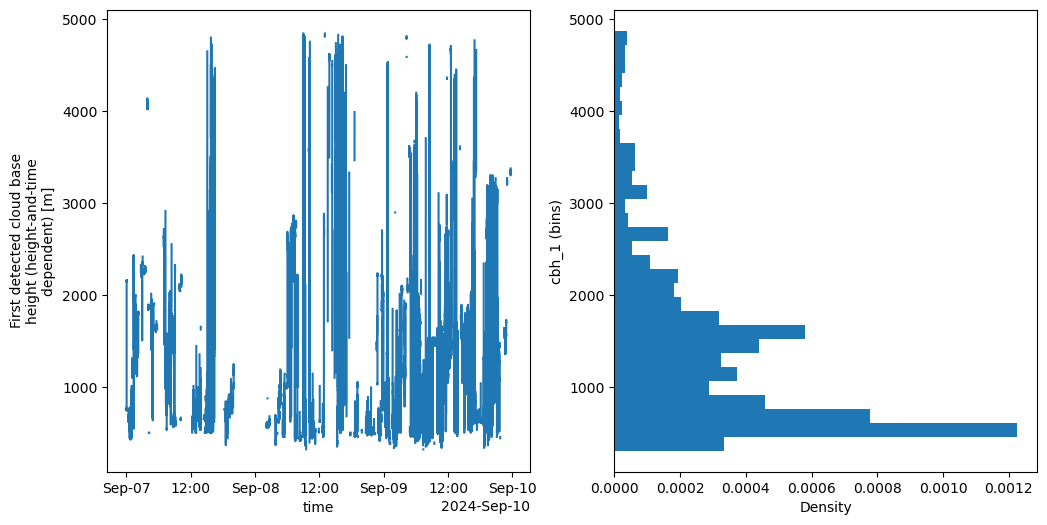

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))

ceilo["cbh_1"].sel(time=slice("2024-09-07", "2024-09-09")).plot(ax=ax[0], x="time")

ceilo["cbh_1"].sel(time=slice("2024-09-07", "2024-09-09")).plot.hist(
    ax=ax[1],
    bins=30,
    density=True,          # x-axis will show density
    orientation="horizontal"
)

ax[1].set_xlabel("Density")
ax[1].set_ylabel("cbh_1 (bins)")

## following Albright, Stevens and Wirth 2025 (preprint as of Jan 26)


In [9]:
dt = pd.Timedelta("30min")

time = ceilo["cbh_1"].time
launch = rs_orcestra_bco.launch_time

mask = (abs(time - launch) <= dt)    ## select ceilometer data, 60 minutes windows centred on launch_time

cbh = ceilo["cbh_1"].clip(max=1000)  ## does this clipping make sense?
rain = ceilo["flag_rain"]            ## see how frequent rain is - should check how this is computed

cbh_windowed = cbh.expand_dims(launch_time=launch).where(mask)
cbh_quantiles = cbh_windowed.quantile(
    q=[0.0, 0.02, 0.05],
    dim="time",
    skipna=True
)


rain_windowed = rain.expand_dims(launch_time=launch).where(mask)
rain_fraction = (
    (rain_windowed == 1).sum(dim="time")
    / rain_windowed.notnull().sum(dim="time")
) * 100



/work/mh1498/m301248/conda/envs/env_hacka/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


## \# compare with MBRS radar


In [5]:
cat_mbrs = intake.open_catalog("https://tcodata.mpimet.mpg.de/catalog.yaml")
mbrs = cat_mbrs.BCO.radar_MBRS_c1_v1.to_dask()
mbrs

KeyError: '.zmetadata'

Text(0, 0.5, 'altitude / m')

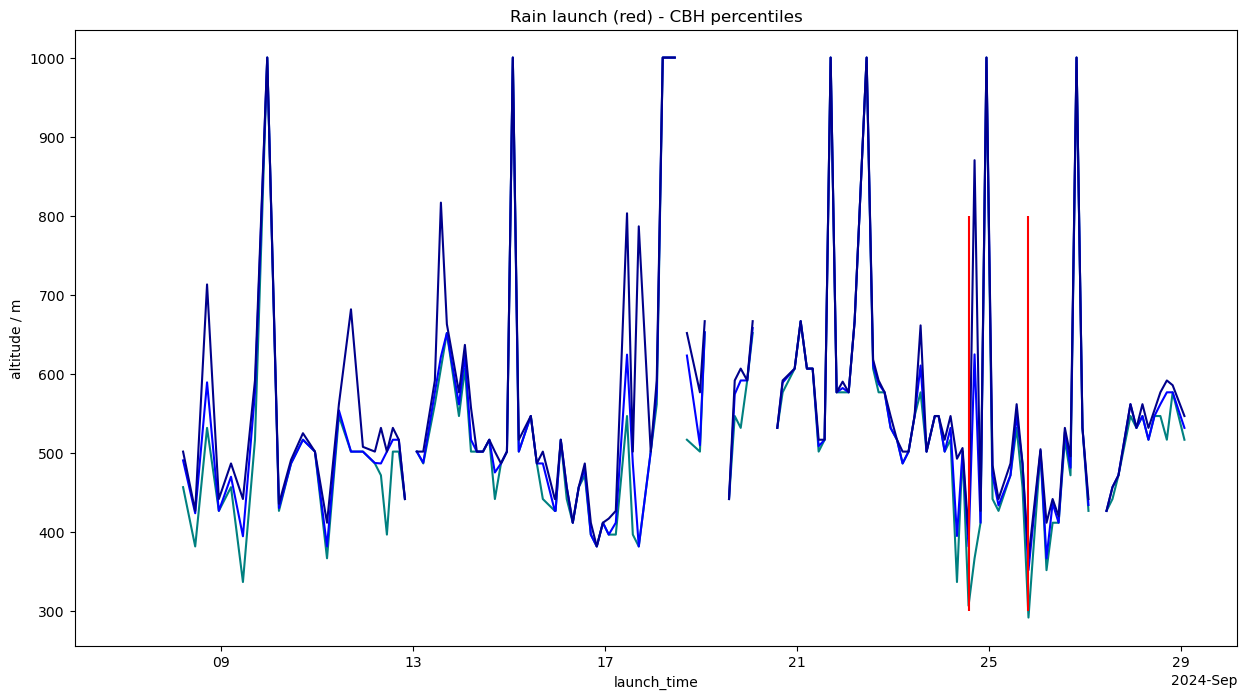

In [17]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

cbh_quantiles.isel(quantile=0).plot(ax=ax, color="teal")
cbh_quantiles.isel(quantile=1).plot(ax=ax, color="blue")
cbh_quantiles.isel(quantile=2).plot(ax=ax, color="darkblue")


rain_times = rain_fraction.launch_time.where(
    rain_fraction >= 50,
    drop=True
)

ax.vlines(
    rain_times,
    ymin=300,
    ymax=800,
    color="red"
)

# ax.vlines(
#     cbh_quantiles.launch_time[-1],
#     ymin=300,
#     ymax=800,
#     color="tab:orange"
# )

ax.set_title("Rain launch (red) - CBH percentiles")
ax.set_ylabel("altitude / m")

Text(0.5, 1.0, 'Saturation (>0.9) lower than 1000m')

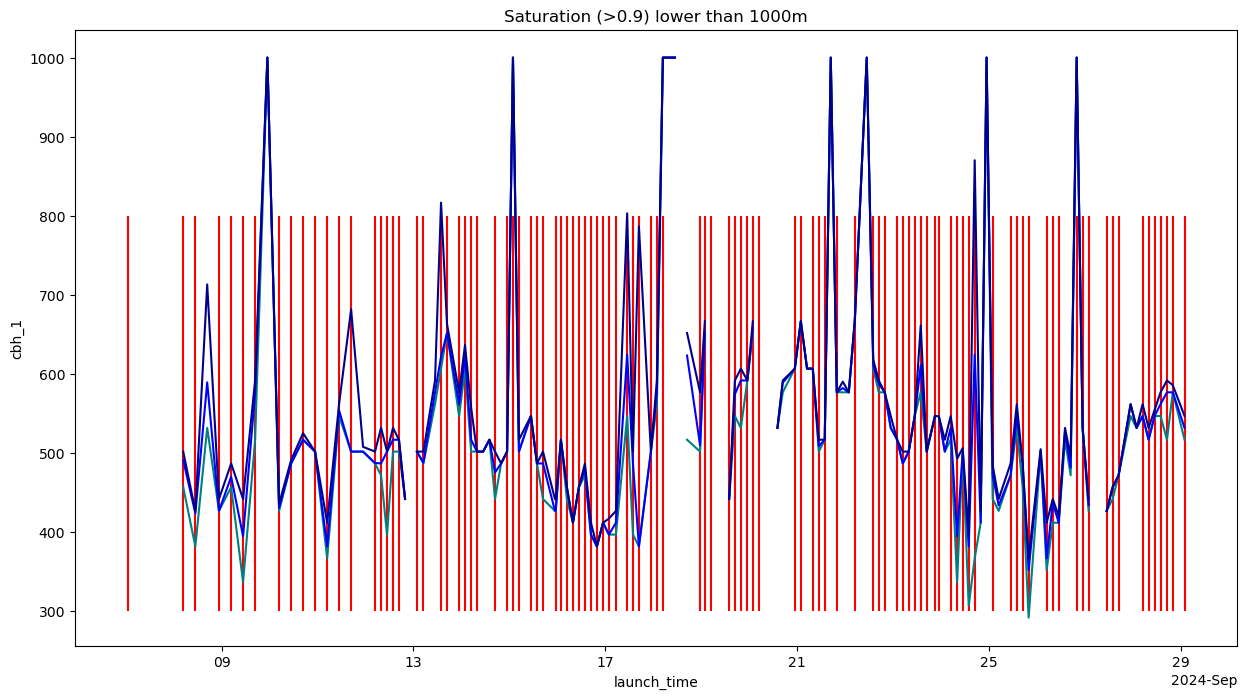

In [43]:
## select radiosounding profiles where RH reaches saturation below 1000m
saturation_thresh = 0.90
sat_cond = (rs_orcestra_bco.rh >= saturation_thresh) & (rs_orcestra_bco.height <= 1000)
sat_rh_prf = rs_orcestra_bco.sel(
    launch_time=(sat_cond).any(dim="height")
)


fig, ax = plt.subplots(1,1, figsize=(15,8))

ax.vlines(
    sat_rh_prf.launch_time,
    ymin=300,
    ymax=800,
    color="red"
)

cbh_quantiles.isel(quantile=0).plot(ax=ax, color="teal")
cbh_quantiles.isel(quantile=1).plot(ax=ax, color="blue")
cbh_quantiles.isel(quantile=2).plot(ax=ax, color="darkblue")


ax.set_title(f"Saturation (>{saturation_thresh}) lower than 1000m")


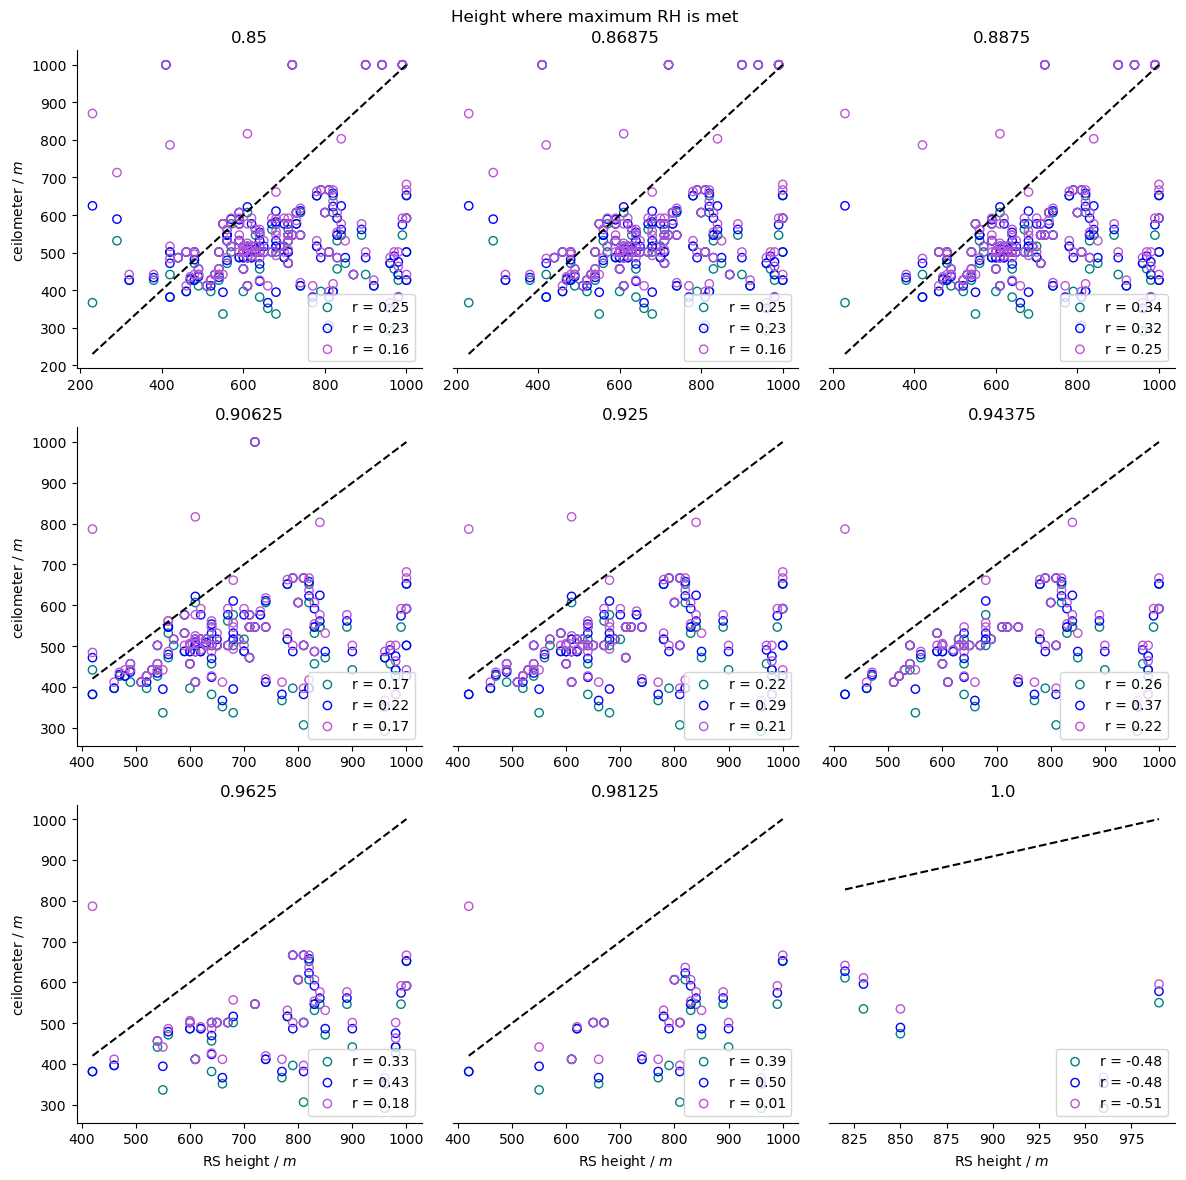

In [ ]:
## compare satuartion height with ceilometer percentiles
saturation_thresh = np.linspace(0.85, 1., 9)

fig, axes = plt.subplots(3,3, figsize=(12,12))
axes = axes.flatten()

## y-values are always the same
y, y1, y2 = cbh_quantiles.isel(quantile=0), cbh_quantiles.isel(quantile=1), cbh_quantiles.isel(quantile=2)

# METHOD to apply
trial = 1  # or 2

for i, sat_val in enumerate(saturation_thresh):
    sat_rh_prf0 = rs_orcestra_bco.rh.sel(height=slice(200,1000))

    cond = (sat_rh_prf0 >= sat_val)

    sat_rh_prf = sat_rh_prf0.sel(
        launch_time=cond.any(dim="height")
    )

    cond_sat = (sat_rh_prf >= sat_val)

    ### --- trial 1 --- ###
    if trial == 1:
        fig.suptitle("First height where saturation thresh exceeded")
    
        # first height where condition is met
        first_idx = cond_sat.idxmax(dim="height")
    ### --- end of trial 1 --- ###

    ### --- trial 2 --- ###
    if trial == 2:
        fig.suptitle("Height where maximum RH is met")

        # height where maximum in RH is met
        first_idx = sat_rh_prf.idxmax(dim="height")
    ### --- end of trial 2 --- ###

    # lowest sat height
    x = (sat_rh_prf.height.sel(height=first_idx)).where(cond_sat.any(dim="height"))


    # align x and y at each step
    x_aligned, y_aligned = xr.align(x, y, join="inner")
    r, p = xr_pearsonr(x_aligned, y_aligned, "launch_time")
    axes[i].scatter(
        x_aligned,
        y_aligned,
        facecolors="none",
        edgecolors="teal", 
        label=f"r = {r:.2f}"
    )

    # align x and y at each step
    x_aligned, y1_aligned = xr.align(x, y1, join="inner")
    r1, p1 = xr_pearsonr(x_aligned, y1_aligned, "launch_time")
    axes[i].scatter(
        x_aligned,
        y1_aligned,
        facecolors="none",
        edgecolors="blue",
        label=f"r = {r1:.2f}"
    )

    # align x and y at each step
    x_aligned, y2_aligned = xr.align(x, y2, join="inner")
    r2, p2 = xr_pearsonr(x_aligned, y2_aligned, "launch_time")
    axes[i].scatter(
        x_aligned,
        y2_aligned,
        facecolors="none",
        edgecolors="mediumorchid",
        label=f"r = {r2:.2f}"
    )

    axes[i].set_title(f"{sat_val}")
    axes[i].plot([x.min().values, x.max().values], [x.min().values, x.max().values], "--k")
    axes[i].legend(loc="lower right")


for i,ax in enumerate(axes):
    if i%3 == 0 :
        ax.set_ylabel(r"ceilometer / $m$")
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
    if (i%3 != 0):
        for spine in ['top', 'right', 'left']:
            ax.spines[spine].set_visible(False)
            ax.yaxis.set_visible(False)

axes[6].set_xlabel(r"RS height / $m$")
axes[7].set_xlabel(r"RS height / $m$")
axes[8].set_xlabel(r"RS height / $m$")

plt.tight_layout()

In [68]:
sat_rh_prf0 = rs_orcestra_bco.rh.sel(
    height=slice(200,1000)) #cond.any(dim="height")
 
cond = (sat_rh_prf0 >= saturation_thresh[3])

sat_rh_prf = sat_rh_prf0.sel(
    launch_time=cond.any(dim="height")
)

cond_sat = (sat_rh_prf >= saturation_thresh[0])

first_idx = cond_sat.idxmax(dim="height")
first_idx


<xarray.DataArray 'height' (launch_time: 97)> Size: 388B
array([610., 330., 240., 360., 200., 200., 500., 230., 300., 390., 480.,
       200., 430., 380., 340., 250., 310., 450., 390., 280., 440., 530.,
       400., 450., 370., 360., 570., 370., 460., 410., 440., 380., 200.,
       290., 380., 200., 260., 320., 270., 200., 210., 250., 240., 200.,
       210., 200., 200., 300., 460., 320., 440., 600., 260., 510., 410.,
       430., 480., 420., 540., 460., 360., 450., 590., 460., 490., 510.,
       290., 340., 500., 450., 320., 500., 490., 420., 380., 350., 300.,
       270., 350., 420., 450., 200., 220., 260., 220., 200., 210., 290.,
       300., 380., 400., 380., 430., 400., 480., 560., 380.],
      dtype=float32)
Coordinates:
  * launch_time  (launch_time) datetime64[ns] 776B 2024-09-07T01:05:09.939968...

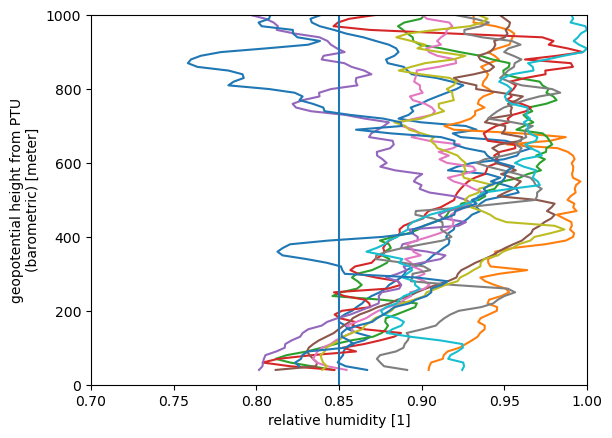

In [69]:
## examples of profiles where height of first exceedance is at 200m

a = rs_orcestra_bco.sel(launch_time=first_idx.launch_time.where(first_idx==200, drop=True))
a.rh.plot.line(y="height", add_legend=False)

plt.vlines(x=saturation_thresh[0], ymin=0, ymax=1e3)

plt.ylim(0,1e3)
plt.xlim(0.7, 1)
plt.show()

### merge the two RS selection methods

In [10]:
cbh_quantiles = cbh_windowed.quantile(
    q=[0.0, 0.02, 0.05],
    dim="time",
    skipna=True
)

/work/mh1498/m301248/conda/envs/env_hacka/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


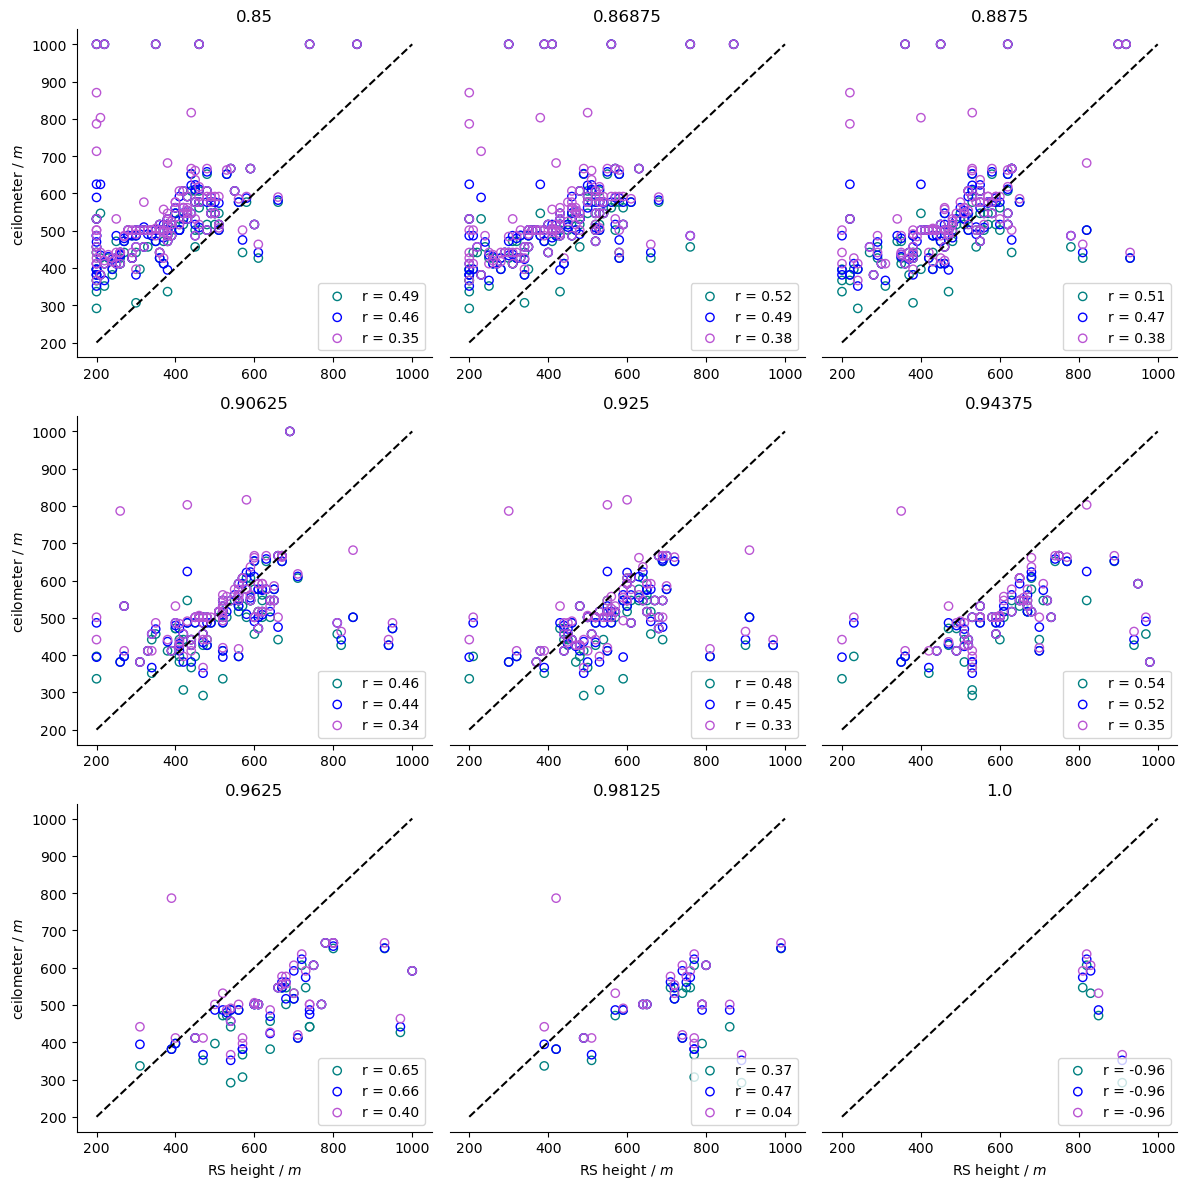

In [11]:
## compare satuartion height with ceilometer percentiles
saturation_thresh = np.linspace(0.85, 1., 9)

fig, axes = plt.subplots(3,3, figsize=(12,12))
axes = axes.flatten()

## y-values are always the same
y, y1, y2 = cbh_quantiles.isel(quantile=0), cbh_quantiles.isel(quantile=1), cbh_quantiles.isel(quantile=2)

for i, sat_val in enumerate(saturation_thresh):
    sat_rh_prf0 = rs_orcestra_bco.rh.sel(height=slice(200,1000))

    cond = (sat_rh_prf0 >= sat_val)

    sat_rh_prf = sat_rh_prf0.sel(
        launch_time=cond.any(dim="height")
    )

    cond_sat = (sat_rh_prf >= sat_val)

    first_idx = cond_sat.idxmax(dim="height")
    fallback_idx = sat_rh_prf.idxmax(dim="height")

    # replace only where first_idx == 200
    # where first_idx is equal to 200, 
    # apply method 2
    first_idx = xr.where(first_idx == 0, fallback_idx, first_idx)

    ## other idea: average
    # mean_idx = (first_idx + fallback_idx)*0.5

    # lowest sat height
    x = (sat_rh_prf.height.sel(height=first_idx).where(cond_sat.any(dim="height")))


    # align x and y at each step
    x_aligned, y_aligned = xr.align(x, y, join="inner")
    r, p = xr_pearsonr(x_aligned, y_aligned, "launch_time")
    axes[i].scatter(
        x_aligned,
        y_aligned,
        facecolors="none",
        edgecolors="teal", 
        label=f"r = {r:.2f}"
    )

    # align x and y at each step
    x_aligned, y1_aligned = xr.align(x, y1, join="inner")
    r1, p1 = xr_pearsonr(x_aligned, y1_aligned, "launch_time")
    axes[i].scatter(
        x_aligned,
        y1_aligned,
        facecolors="none",
        edgecolors="blue",
        label=f"r = {r1:.2f}"
    )

    # align x and y at each step
    x_aligned, y2_aligned = xr.align(x, y2, join="inner")
    r2, p2 = xr_pearsonr(x_aligned, y2_aligned, "launch_time")
    axes[i].scatter(
        x_aligned,
        y2_aligned,
        facecolors="none",
        edgecolors="mediumorchid",
        label=f"r = {r2:.2f}"
    )

    axes[i].set_title(f"{sat_val}")
    # axes[i].plot([x.min().values, x.max().values], [x.min().values, x.max().values], "--k")
    axes[i].plot([200., 1000.], [200., 1000.], "--k")
    axes[i].legend(loc="lower right")


for i,ax in enumerate(axes):
    ax.set_xlim(150, 1050)
    if i%3 == 0 :
        ax.set_ylabel(r"ceilometer / $m$")
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
    if (i%3 != 0):
        for spine in ['top', 'right', 'left']:
            ax.spines[spine].set_visible(False)
            ax.yaxis.set_visible(False)

axes[6].set_xlabel(r"RS height / $m$")
axes[7].set_xlabel(r"RS height / $m$")
axes[8].set_xlabel(r"RS height / $m$")

plt.tight_layout()

### add LCL estimates

In [12]:
## compute LCL here
import metpy.calc as mpcalc
from metpy.units import units

# Ensure xarray + pint units
temp_q = wxt_radio['T'].metpy.quantify()

######## debug RH ########
rh = wxt_radio['RH']
rh.attrs["units"] = "%"
rh_q = rh.metpy.quantify()
######## debug RH ########
p_q = wxt_radio['P'].metpy.quantify()

# Compute dewpoint: stays xarray with same dims
dp = mpcalc.dewpoint_from_relative_humidity(temp_q, rh_q)

# Compute LCL: returns two xarray DataArrays with same dims as temp
lcl_p, lcl_T = mpcalc.lcl(p_q, temp_q, dp)

# Convert LCL pressure to height — returns pint.Quantity, NOT xarray
lcl_h = mpcalc.pressure_to_height_std(lcl_p)

# Convert to meters
lcl_h = lcl_h.to(units.meter)

# --- FIX: rewrap into DataArray using the original coords ---
lcl_h = xr.DataArray(
    lcl_h.m,  # magnitude
    coords=temp_q.coords,
    dims=temp_q.dims,
    name='lcl_height'
)  #.metpy.quantify()  # restore pint units inside xarray

# Now resample works
lcl_h_hr = lcl_h.resample(time="1h").mean()

In [15]:
# create hour-wide windows around sonde launch times

dt = pd.Timedelta("30min")

time = lcl_h.time
launch = rs_orcestra_bco.launch_time

mask = (abs(time - launch) <= dt)    ## select ceilometer data, 60 minutes windows centred on launch_time

# cbh = lcl_h.clip(max=1000)  ## does this clipping make sense?
rain = ceilo["flag_rain"]            ## see how frequent rain is - should check how this is computed

lcl_windowed = lcl_h.expand_dims(launch_time=launch).where(mask)
lcl_quantiles = lcl_windowed.quantile(
    q=[0.05, 0.5, 0.95],
    dim="time",
    skipna=True
)

lcl_quantiles = lcl_quantiles.rename({"quantile": "quantile_lcl"})

In [17]:

saturation_thresh = np.linspace(0.85, 0.95, 4)

cbhs_xr = xr.Dataset(
    coords={
        "launch_time": rs_orcestra_bco.launch_time,
        "saturation_threshold": saturation_thresh,
    }
)


## do a bit of cosmetics
cbh_quantiles.attrs = {
    "description":"low quantiles of windowed ceilometer cbh_1 values",
    "quantile values": ["0%", "2%", "5%"]
}

lcl_quantiles.attrs = {
    "description":"low quantiles of windowed LCL values",
    "quantile values": ["5%", "50%", "95%"]
}

cbhs_xr["cbh_quantiles"] = cbh_quantiles
cbhs_xr["lcl_quantiles"] = lcl_quantiles


cbhs_xr.to_netcdf("/work/mh1498/m301248/TCO_data/cbh_data/OR_cbh_lcl_windowed_quantiles.nc")

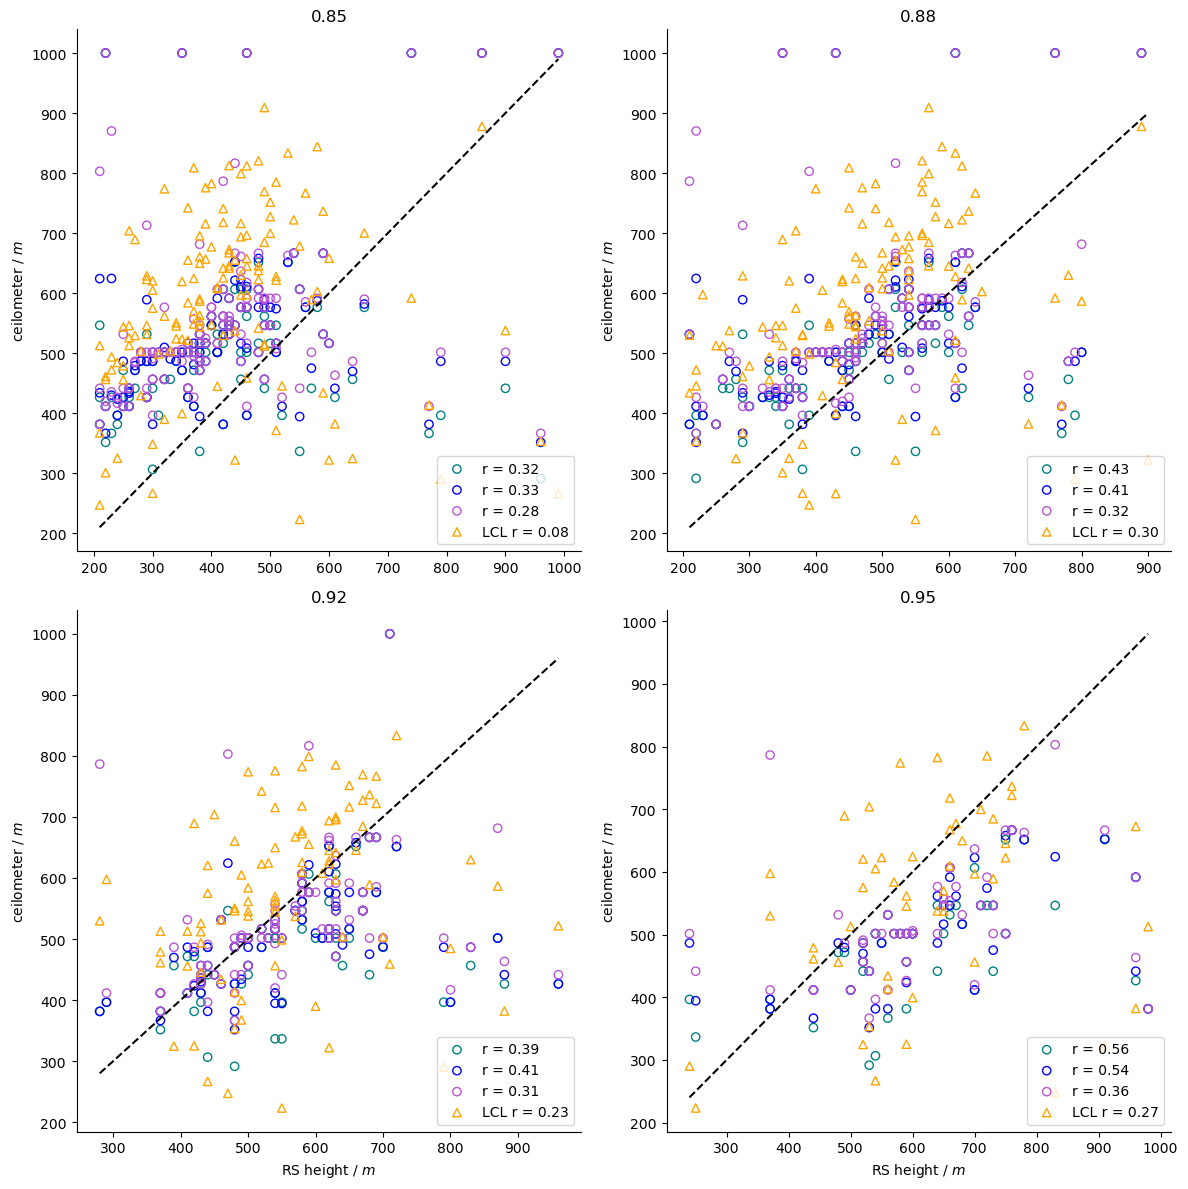

In [19]:
## compare satuartion height with ceilometer percentiles
# saturation_thresh = np.linspace(0.85, 0.95, 4)

rh_cbh_collector = []

fig, axes = plt.subplots(2,2, figsize=(12,12))
axes = axes.flatten()

## y-values are always the same
y, y1, y2 = cbh_quantiles.isel(quantile=0), cbh_quantiles.isel(quantile=1), cbh_quantiles.isel(quantile=2)
cbh_qq_colors = ["teal", "blue", "mediumorchid"]


## LCL median values within each window
y_lcl = lcl_quantiles.isel(quantile_lcl=0)


for i, sat_val in enumerate(saturation_thresh):

    sat_rh_prf0 = rs_orcestra_bco.rh.sel(height=slice(200,1000))

    cond = (sat_rh_prf0 >= sat_val)

    sat_rh_prf = sat_rh_prf0.sel(
        launch_time=cond.any(dim="height")
    )

    cond_sat = (sat_rh_prf >= sat_val)

    first_idx = cond_sat.idxmax(dim="height")
    fallback_idx = sat_rh_prf.idxmax(dim="height")

    # replace only where first_idx == 200
    # where first_idx is equal to 200, 
    # apply method 2
    first_idx = xr.where(first_idx == 200, fallback_idx, first_idx)

    ## other idea: average
    # mean_idx = (first_idx + fallback_idx)*0.5

    # lowest sat height
    x = (sat_rh_prf.height.sel(height=first_idx).where(cond_sat.any(dim="height")))


    ## for saving purposes
    rh_cbh_collector.append(x)


    for qq in range(lcl_quantiles.shape[0]):
        # align x and y at each step
        x_aligned, y_aligned = xr.align(x, cbh_quantiles.isel(quantile=qq), join="inner")
        r, p = xr_pearsonr(x_aligned, y_aligned, "launch_time")
        axes[i].scatter(
            x_aligned,
            y_aligned,
            facecolors="none",
            edgecolors=cbh_qq_colors[qq], 
            label=f"r = {r:.2f}"
        )

    # align x and y at each step
    x_aligned, y_lcl_aligned = xr.align(x, y_lcl, join="inner")
    r_lcl, p_lcl = xr_pearsonr(x_aligned, y_lcl_aligned, "launch_time")
    axes[i].scatter(
        x_aligned,
        y_lcl_aligned,
        facecolors="none",
        edgecolors="orange",
        marker="^",
        label=f"LCL r = {r_lcl.values:.2f}"
    )

    axes[i].set_title(f"{sat_val:.2f}")
    axes[i].plot([x.min().values, x.max().values], [x.min().values, x.max().values], "--k")
    axes[i].legend(loc="lower right")


# for i,ax in enumerate(axes):
#     if i%3 == 0 :
#         ax.set_ylabel(r"ceilometer / $m$")
#         for spine in ['top', 'right']:
#             ax.spines[spine].set_visible(False)
#     if (i%3 != 0):
#         for spine in ['top', 'right', 'left']:
#             ax.spines[spine].set_visible(False)
#             ax.yaxis.set_visible(False)

for i,ax in enumerate(axes):
    ax.set_ylabel(r"ceilometer / $m$")
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)


axes[2].set_xlabel(r"RS height / $m$")
axes[3].set_xlabel(r"RS height / $m$")
# axes[8].set_xlabel(r"RS height / $m$")

plt.tight_layout()

as from what observed above, the wxt underestimates specific humidity and hnce LCL remain often higher than ceilometer values (and RS, depending on the threshold)

In [20]:
for i,x in enumerate(rh_cbh_collector):
    x.attrs = {
        "description": "RH - derived radiosounding cloud base height",
        "RH threshold": saturation_thresh[i]
    }

    filename = "OR_rs_RH_cbh_thresh"+str(int(saturation_thresh[i]*100))+".nc"
    print(filename)
    x.to_netcdf("/work/mh1498/m301248/TCO_data/cbh_data/"+filename)
    del filename

OR_rs_RH_cbh_thresh85.nc
OR_rs_RH_cbh_thresh88.nc
OR_rs_RH_cbh_thresh91.nc
OR_rs_RH_cbh_thresh95.nc


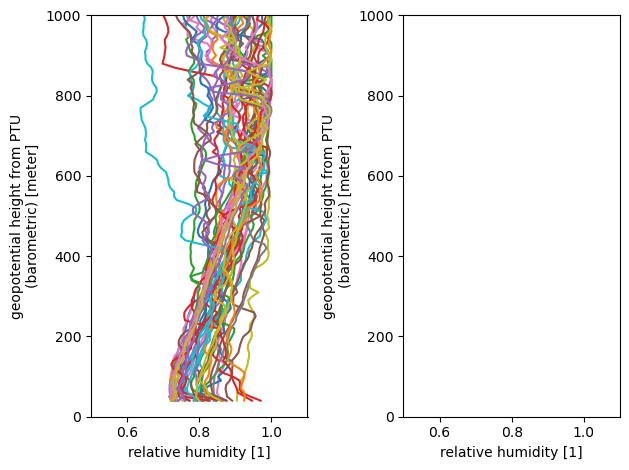

In [ ]:
ascending = rs_orcestra_bco.where(rs_orcestra_bco.ascent_flag==0)
sat = ascending.where((ascending.height <= 1000)&(ascending.rh >= 0.98).any(dim="height"))
unsat = ascending.where((ascending.height <= 1000)&(ascending.rh < 0.98).all(dim="height"))

fig, ax = plt.subplots(1,2)

sat.rh.plot.line(ax=ax[0], y="height", add_legend=False)


unsat.rh.plot.line(ax=ax[1], y="height", add_legend=False)


for x in ax:
    x.set_ylim(0,1e3)
    x.set_xlim(0.5,1.1)

plt.tight_layout()
plt.show()

In [68]:
eureca_meteor = xr.open_dataset("/work/mh1498/m301248/TCO_data/EUREC4A_rv/EUREC4A_tracks_Meteor_v1.0.nc")
eureca_meteor

<xarray.Dataset> Size: 950kB
Dimensions:  (time: 47520)
Coordinates:
  * time     (time) datetime64[ns] 380kB 2020-01-18 ... 2020-02-19T23:59:00
Data variables:
    lat      (time) float32 190kB ...
    lon      (time) float32 190kB ...
    alt      (time) float32 190kB ...
Attributes:
    history:      Created from source   by B Stevens (bjorn.stevens@mpimet.mp...
    title:        Trajectory from Meteor position data
    campaign:     EUREC4A
    platform:     Meteor
    product:      tracks
    Conventions:  CF-1.8
    institution:  DFG
    source:       EUREC4A_DSHIP_Meteor_v1.00.nc
    featureType:  trajectory
    version:      v1.0
    contact:      Wiebke Mohr, email: wmohr@mpi-bremen.de; Stefan Kinne, emai...
    doi:          10.25326/165

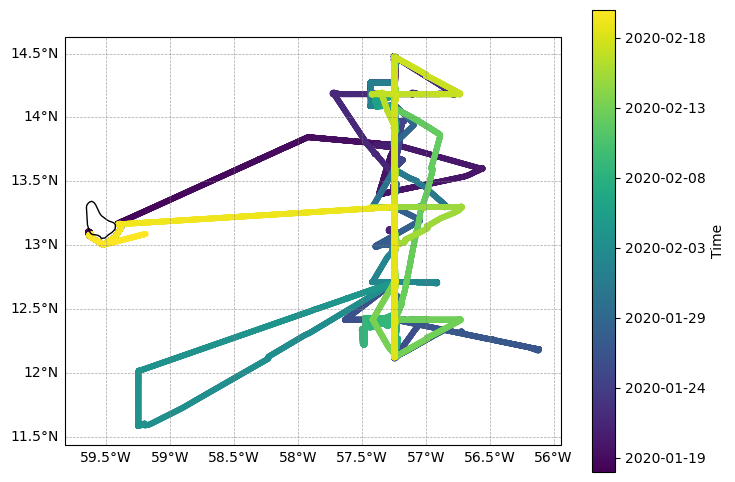

In [70]:

# Convert time to numeric values for coloring
time_values = eureca_meteor["time"].values
time_num = mdates.date2num(time_values)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

sc = ax.scatter(
    eureca_meteor["lon"].values,
    eureca_meteor["lat"].values,
    c=time_num,
    cmap="viridis",
    s=10,
    transform=ccrs.PlateCarree()
)

# Colorbar with date formatting
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Time")
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))





gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    color='gray',
    alpha=0.7,
    linestyle='--'
)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}


plt.show()